<b><font size="6"> Data Mining Project - Group 40 2025/2026 </font></b><br><br>
<i> <font size="4"> Amazing International Airlines Inc. (AIAI)</font></i>

`Group XX`

20250405 Ana Macedo <br>
20250453 Lourenço Silva <br>
20250380 Maria Fonseca <br>

# Import Libraries 

In this section, we import the essential Python libraries that will support data processing, visualization, and analysis throughout the project. Each library provides specific functionality that helps streamline the workflow.

In [1]:
import sqlite3
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil

# To show all columns in the dataframe
!pip install tabulate
import itertools
from itertools import zip_longest
from tabulate import tabulate

from ydata_profiling import ProfileReport

# for better resolution plots
%config InlineBackend.figure_format = 'retina'

#o svg consegue ampliar infinitamente os gráficos sem perder qualidade mas às vezes é mais lento 
#por isso agora usamos retina

np.random.seed(40311)
sns.set()

# Loading the Data

In this section, we load the datasets from CSV files using commas as column separators and set the unique customer identifier as the index for both tables. This step ensures that the data is properly structured, accessible, and ready for further exploration and analysis.

In [2]:
customerDB = pd.read_csv('data/DM_AIAI_CustomerDB.csv', sep = ",")

Remove the 'Unnamed' column referring to a sequential numbering of the rows, as we set the column "Loyalty#" as the index

In [3]:
customerDB = customerDB.iloc[:, 1:]
customerDB

Loyalty# First Name    Last Name        Customer Name Country  \
0        480934    Cecilia  Householder  Cecilia Householder  Canada   
1        549612      Dayle        Menez          Dayle Menez  Canada   
2        429460     Necole       Hannon        Necole Hannon  Canada   
3        608370      Queen        Hagee          Queen Hagee  Canada   
4        530508     Claire      Latting       Claire Latting  Canada   
...         ...        ...          ...                  ...     ...   
16916    100012      Ethan     Thompson       Ethan Thompson  Canada   
16917    100013      Layla        Young          Layla Young  Canada   
16918    100014     Amelia      Bennett       Amelia Bennett  Canada   
16919    100015   Benjamin       Wilson      Benjamin Wilson  Canada   
16920    100016       Emma       Martin          Emma Martin  Canada   

      Province or State          City   Latitude   Longitude Postal code  \
0               Ontario       Toronto  43.653225  -79.383186     M2Z 4K1   
1               Alberta      Edmonton  53.544388 -113.490930     T3G 6Y6   
2      British Columbia     Vancouver  49.282730 -123.120740     V6E 3D9   
3               Ontario       Toronto  43.653225  -79.383186     P1W 1K4   
4                Quebec          Hull  45.428730  -75.713364     J8Y 3Z5   
...                 ...           ...        ...         ...         ...   
16916            Quebec   Quebec City  46.759733  -71.141009     Y0C 7D6   
16917           Alberta      Edmonton  53.524829 -113.546357     L3S 9Y3   
16918     New Brunswick       Moncton  46.051866  -64.825428     G2S 2B6   
16919            Quebec   Quebec City  46.862970  -71.133444     B1Z 8T3   
16920  British Columbia  Dawson Creek  55.720562 -120.160090     M4A 1E4   

       Gender Education Location Code   Income Marital Status LoyaltyStatus  \
0      female  Bachelor         Urban  70146.0        Married          Star   
1        male   College         Rural      0.0       Divorced          Star   
2        male   College         Urban      0.0         Single          Star   
3        male   College      Suburban      0.0         Single          Star   
4        male  Bachelor      Suburban  97832.0        Married          Star   
...       ...       ...           ...      ...            ...           ...   
16916    male  Bachelor      Suburban      NaN         Single          Star   
16917  female  Bachelor         Rural      NaN        Married          Star   
16918    male  Bachelor         Rural      NaN        Married          Star   
16919  female   College         Urban      NaN        Married          Star   
16920  female    Master      Suburban      NaN         Single          Star   

      EnrollmentDateOpening CancellationDate  Customer Lifetime Value  \
0                 2/15/2019              NaN                  3839.14   
1                  3/9/2019              NaN                  3839.61   
2                 7/14/2017         1/8/2021                  3839.75   
3                 2/17/2016              NaN                  3839.75   
4                10/25/2017              NaN                  3842.79   
...                     ...              ...                      ...   
16916             2/27/2019        2/27/2019                      NaN   
16917             9/20/2017        9/20/2017                      NaN   
16918            11/28/2020       11/28/2020                      NaN   
16919              4/9/2020         4/9/2020                      NaN   
16920             7/21/2020        7/21/2020                      NaN   

       EnrollmentType  
0            Standard  
1            Standard  
2            Standard  
3            Standard  
4      2021 Promotion  
...               ...  
16916        Standard  
16917        Standard  
16918        Standard  
16919        Standard  
16920        Standard  

[16921 rows x 20 columns]

# Metadata

In this section, we provide a detailed description of the features contained in both datasets, FlightsDB and CustomerDB. Understanding the meaning and structure of each attribute is essential for interpreting the data correctly and guiding subsequent analytical steps.

**FlightsDB Database feature Description**
- **Loyalty#:**	Unique customer identifier linking to CustomerDB
- **Year:**	Year of flight activity record
- **Month:**	Month of flight activity record (1-12)
- **YearMonthDate:**	First day of the month for the activity period
- **NumFlights:**	Total number of flights taken by customer in the month
- **NumFlightsWithCompanions:**	Number of flights where customer traveled with companions
- **DistanceKM:**	Total distance traveled in kilometers for the month
- **PointsAccumulated:**	Loyalty points earned by customer during the month
- **PointsRedeemed:**	Loyalty points spent/redeemed by customer during the month
- **DollarCostPointsRedeemed:**	Dollar value of points redeemed during the month

**CustomerDB Database feature Description**
- **Loyalty#:**  Unique customer identifier for loyalty program members
- **First Name:**   Customer's first name
- **Last Name:**   Customer's last name 
- **Customer Name:** Customer's full name (concatenated)
- **Country:**	Customer's country of residence
- **Province or State:**	Customer's province or state
- **City:**	Customer's city of residence
- **Latitude:**	Geographic latitude coordinate of customer location
- **Longitude:**	Geographic longitude coordinate of customer locatio
- **Postal code:**	Customer's postal/ZIP code
- **Gender:**	Customer's gender
- **Education:**	Customer's highest education level (Bachelor, College, etc.)
- **Location:** Code	Urban/Suburban/Rural classification of customer residence
- **Income:**	Customer's annual income
- **Marital Status:**	Customer's marital status (Married, Single, Divorced)
- **LoyaltyStatus:**	Current tier status in loyalty program (Star > Nova > Aurora)
- **EnrollmentDateOpening:**	Date when customer joined the loyalty program
- **CancellationDate:**	Date when customer left the program
- **Customer Lifetime:** Value	Total calculated monetary value of customer relationship
- **EnrollmentType:**	Method of joining loyalty program

# Descriptive Statistics and Visualisations (CustomerDB)

Now, on the customerDB dataset, we create two lists to distinguish between metric and non-metric features. This separation helps us to analyze each group appropriately and ensures that our statistical and visual analyses are focused on the most relevant characteristics of customer behavior.

In [4]:
# Transforming EnrollmentDateOpening and CancellationDate to datetime format
customerDB['EnrollmentDateOpening'] = pd.to_datetime(customerDB['EnrollmentDateOpening'], errors='coerce')
customerDB['CancellationDate'] = pd.to_datetime(customerDB['CancellationDate'], errors='coerce')

# Adding EnrollmentYear and CancellationYear columns to CustomerDB so we can add it to the metric features and analyze it later on visualizations
customerDB['EnrollmentYear'] = customerDB['EnrollmentDateOpening'].dt.year
customerDB['CancellationYear'] = customerDB['CancellationDate'].dt.year
#errors='coerce' will convert invalid parsing to NaT

# Add EnrollmentMonth and CancellationMonth columns to CustomerDB for further analysis
#customerDB['EnrollmentMonth'] = customerDB['EnrollmentDateOpening'].dt.month
#customerDB['CancellationMonth'] = customerDB['CancellationDate'].dt.month

In [5]:
dates_features = customerDB[["EnrollmentDateOpening", "CancellationDate"]].columns.tolist()

metric_features_CDB = customerDB.select_dtypes(include=['number']).columns.tolist()[1:] # Exclude 'Loyalty#' which is the first column
non_metric_features_CDB = customerDB.columns.drop(metric_features_CDB).to_list()[1:]

continuous_features_CDB = ["Latitude", "Longitude", "Income", "Customer Lifetime Value"]
discrete_features_CDB = customerDB[["EnrollmentYear", "CancellationYear"]].columns.tolist()
categorical_features_CDB = customerDB.select_dtypes(include= 'object', exclude='datetime').columns.tolist()

Now we show the lists that were defined before in a dataframe format so we can have a better view of the features that each list contain.

In [6]:
data = list(zip_longest(
    dates_features,
    metric_features_CDB,
    non_metric_features_CDB,
    continuous_features_CDB,
    discrete_features_CDB,
    categorical_features_CDB,
    fillvalue=""
))

headers = [
    "Date Features",
    "Metric Features",
    "Non-Metric Features",
    "Continuous Features",
    "Discrete Features",
    "Categorical Features"
]

print(tabulate(data, headers=headers, tablefmt="github"))


| Date Features         | Metric Features         | Non-Metric Features   | Continuous Features     | Discrete Features   | Categorical Features   |
|-----------------------|-------------------------|-----------------------|-------------------------|---------------------|------------------------|
| EnrollmentDateOpening | Latitude                | First Name            | Latitude                | EnrollmentYear      | First Name             |
| CancellationDate      | Longitude               | Last Name             | Longitude               | CancellationYear    | Last Name              |
|                       | Income                  | Customer Name         | Income                  |                     | Customer Name          |
|                       | Customer Lifetime Value | Country               | Customer Lifetime Value |                     | Country                |
|                       | EnrollmentYear          | Province or State     |                         |     

## Metric Features Visualizations (CustomerDB)

### **Histograms**

After distinguishing between metric and non-metric features, we observe that all metric features in the customerDB dataset are continuous. To explore their distributions, we present histograms for each variable. For a clearer representation, and to better visualize the underlying patterns, we overlay a smooth line on each histogram. This general analysis helps to identify trends and understand the overall behavior of these continuous features.

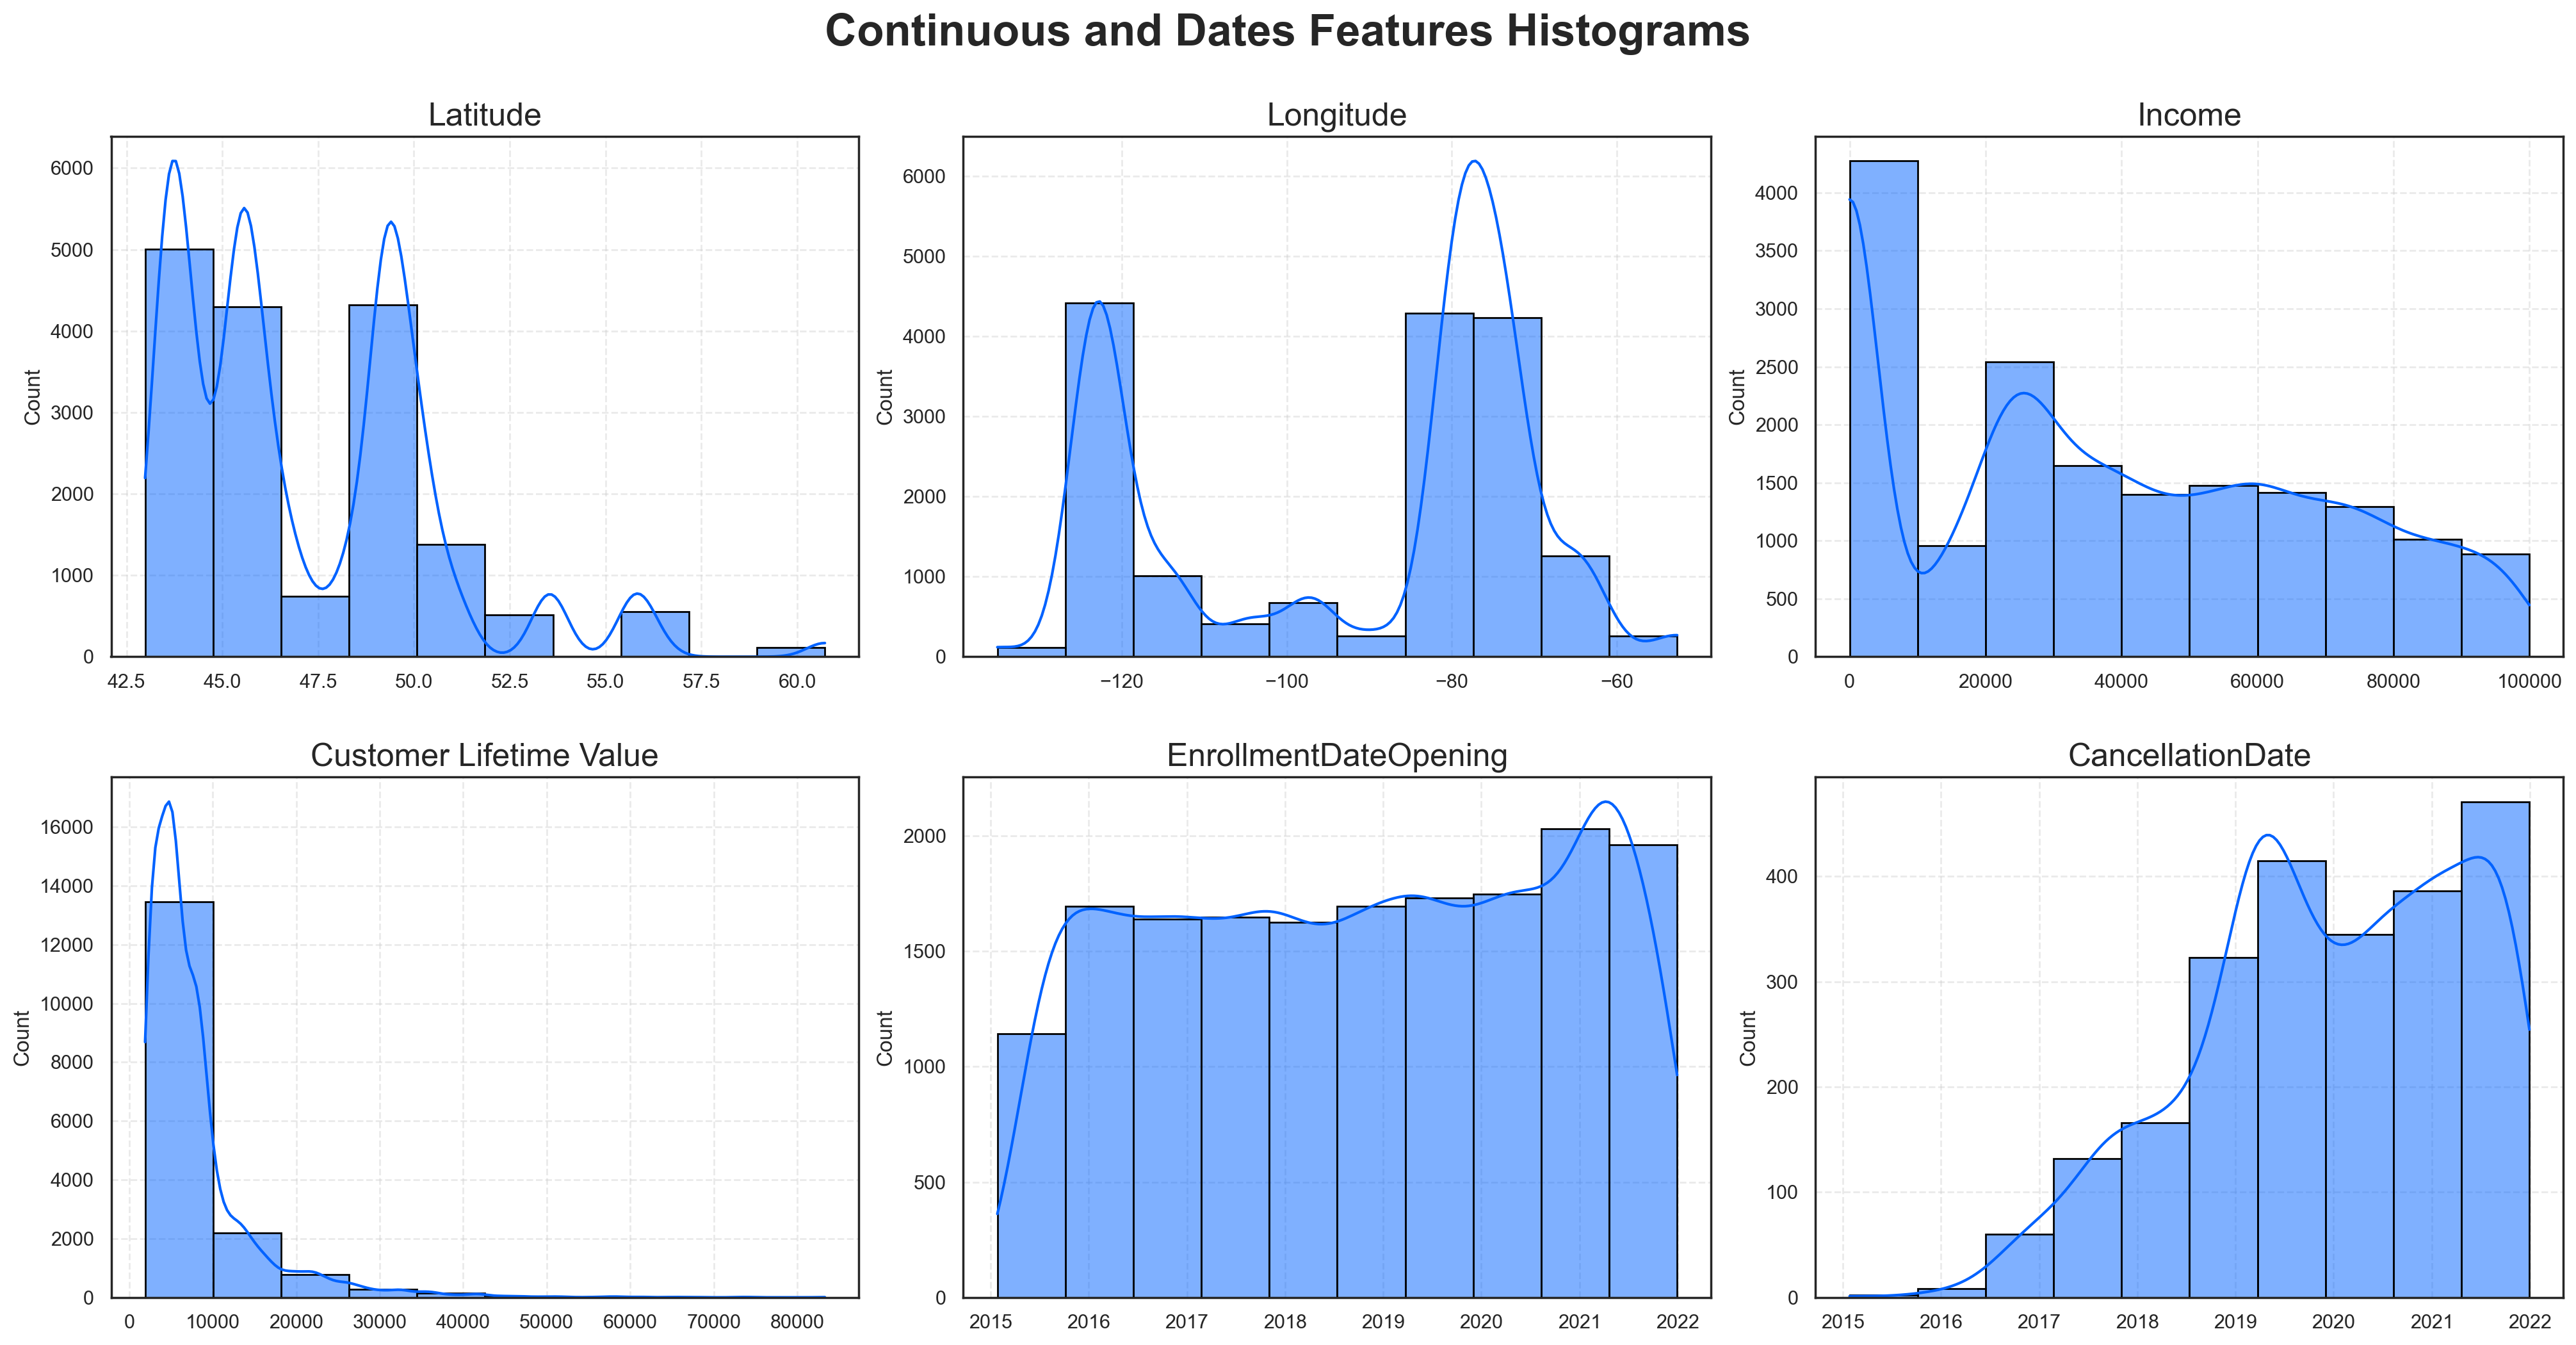

In [ ]:
#To plot histograms we will use continuous and date features that were identified before

# Set minimal style
sns.set_style("white") # increase contrast

# Create a canvas for the metric features
fig, axes = plt.subplots(2, # set number of rows
                         ceil(len(continuous_features_CDB + dates_features) / 2), # adapt the number of columns to the number of features 
                         figsize=(20, 10),
                         constrained_layout=True) # Adjust automatically spacing between subplot and labels 

# Increase vertical space between rows
fig.set_constrained_layout_pads(h_pad=.2)

# Plot the data
# Iterate across axes objects and associate each histogram:
for ax, feat in zip(axes.flatten(), continuous_features_CDB + dates_features):
    sns.histplot(customerDB[feat],
                 bins=10,
                 kde=(feat in continuous_features_CDB + dates_features), #smooth line only for continuous features
                 ax=ax,
                 color="#0062FF",
                 edgecolor="black")
    ax.set_title(feat, fontsize=18)
    ax.grid(True, linestyle="--", alpha=0.4)
    ax.set_xlabel("")

# Layout
# Add title, make it bigger and bold and add space between title and first row of plots
plt.suptitle("Continuous and Dates Features Histograms", 
             fontsize = 25, fontweight="bold", y=1.05)

# Create the folder '../figures/eda' if it doesn't already exist
os.makedirs(os.path.join('..', 'figures', 'eda'), exist_ok=True)
    
# Save figure to a png file in the folder created before
plt.savefig(os.path.join('..', 'figures', 'eda', 'numeric_features_histograms.png'), dpi=200)

# Show plot
plt.show()

From the histograms above we can see that:

- `Latitude:` Shows a right skewed distribution, with very inconsistent values, suggesting that customers are located in several distinct regions, possibly corresponding to different branch or market areas.

- `Longitude:` Values show two strong clusters at the extremes, which may correspond to distinct geographical regions or countries where customers are concentrated.

- `Income`: The distribution is right-skewed with a heavy tail, biggest group being the first bin (least income), which represents low-budget travelers and it shows a sudden drop in the second bin, which could represent different customer segments (economy-class).

- `Customer Lifetime Value`: Heavily right-skewed distribution, with a very heavy tail, which shows that most customers have relatively low lifetime values, while a small minority contributes disproportionately high value.

- `EnrollmentDateOpening:` Appear to be relatively uniform from 2015 to 2021, with a slight increase toward more recent years. This suggests steady customer acquisition over time, possibly with stronger marketing or expansion after 2019.

- `CancellationDate:`The number of cancellations has been increasing steadily since 2016, peaking around 2021. This could indicate growing customer churn in recent years, perhaps due to increased competition, customer dissatisfaction, or changes in business strategy.

### **Boxplots**

To further analyze the distribution of metric features in the customerDB, we utilize boxplots. These visualizations were applied to continuous numerical features allow us to efficiently spot potential outliers and to summarize key aspects such as the spread, central tendency, and skewness of each feature. This approach supports a thorough assessment of data quality and guides subsequent analytical decisions.

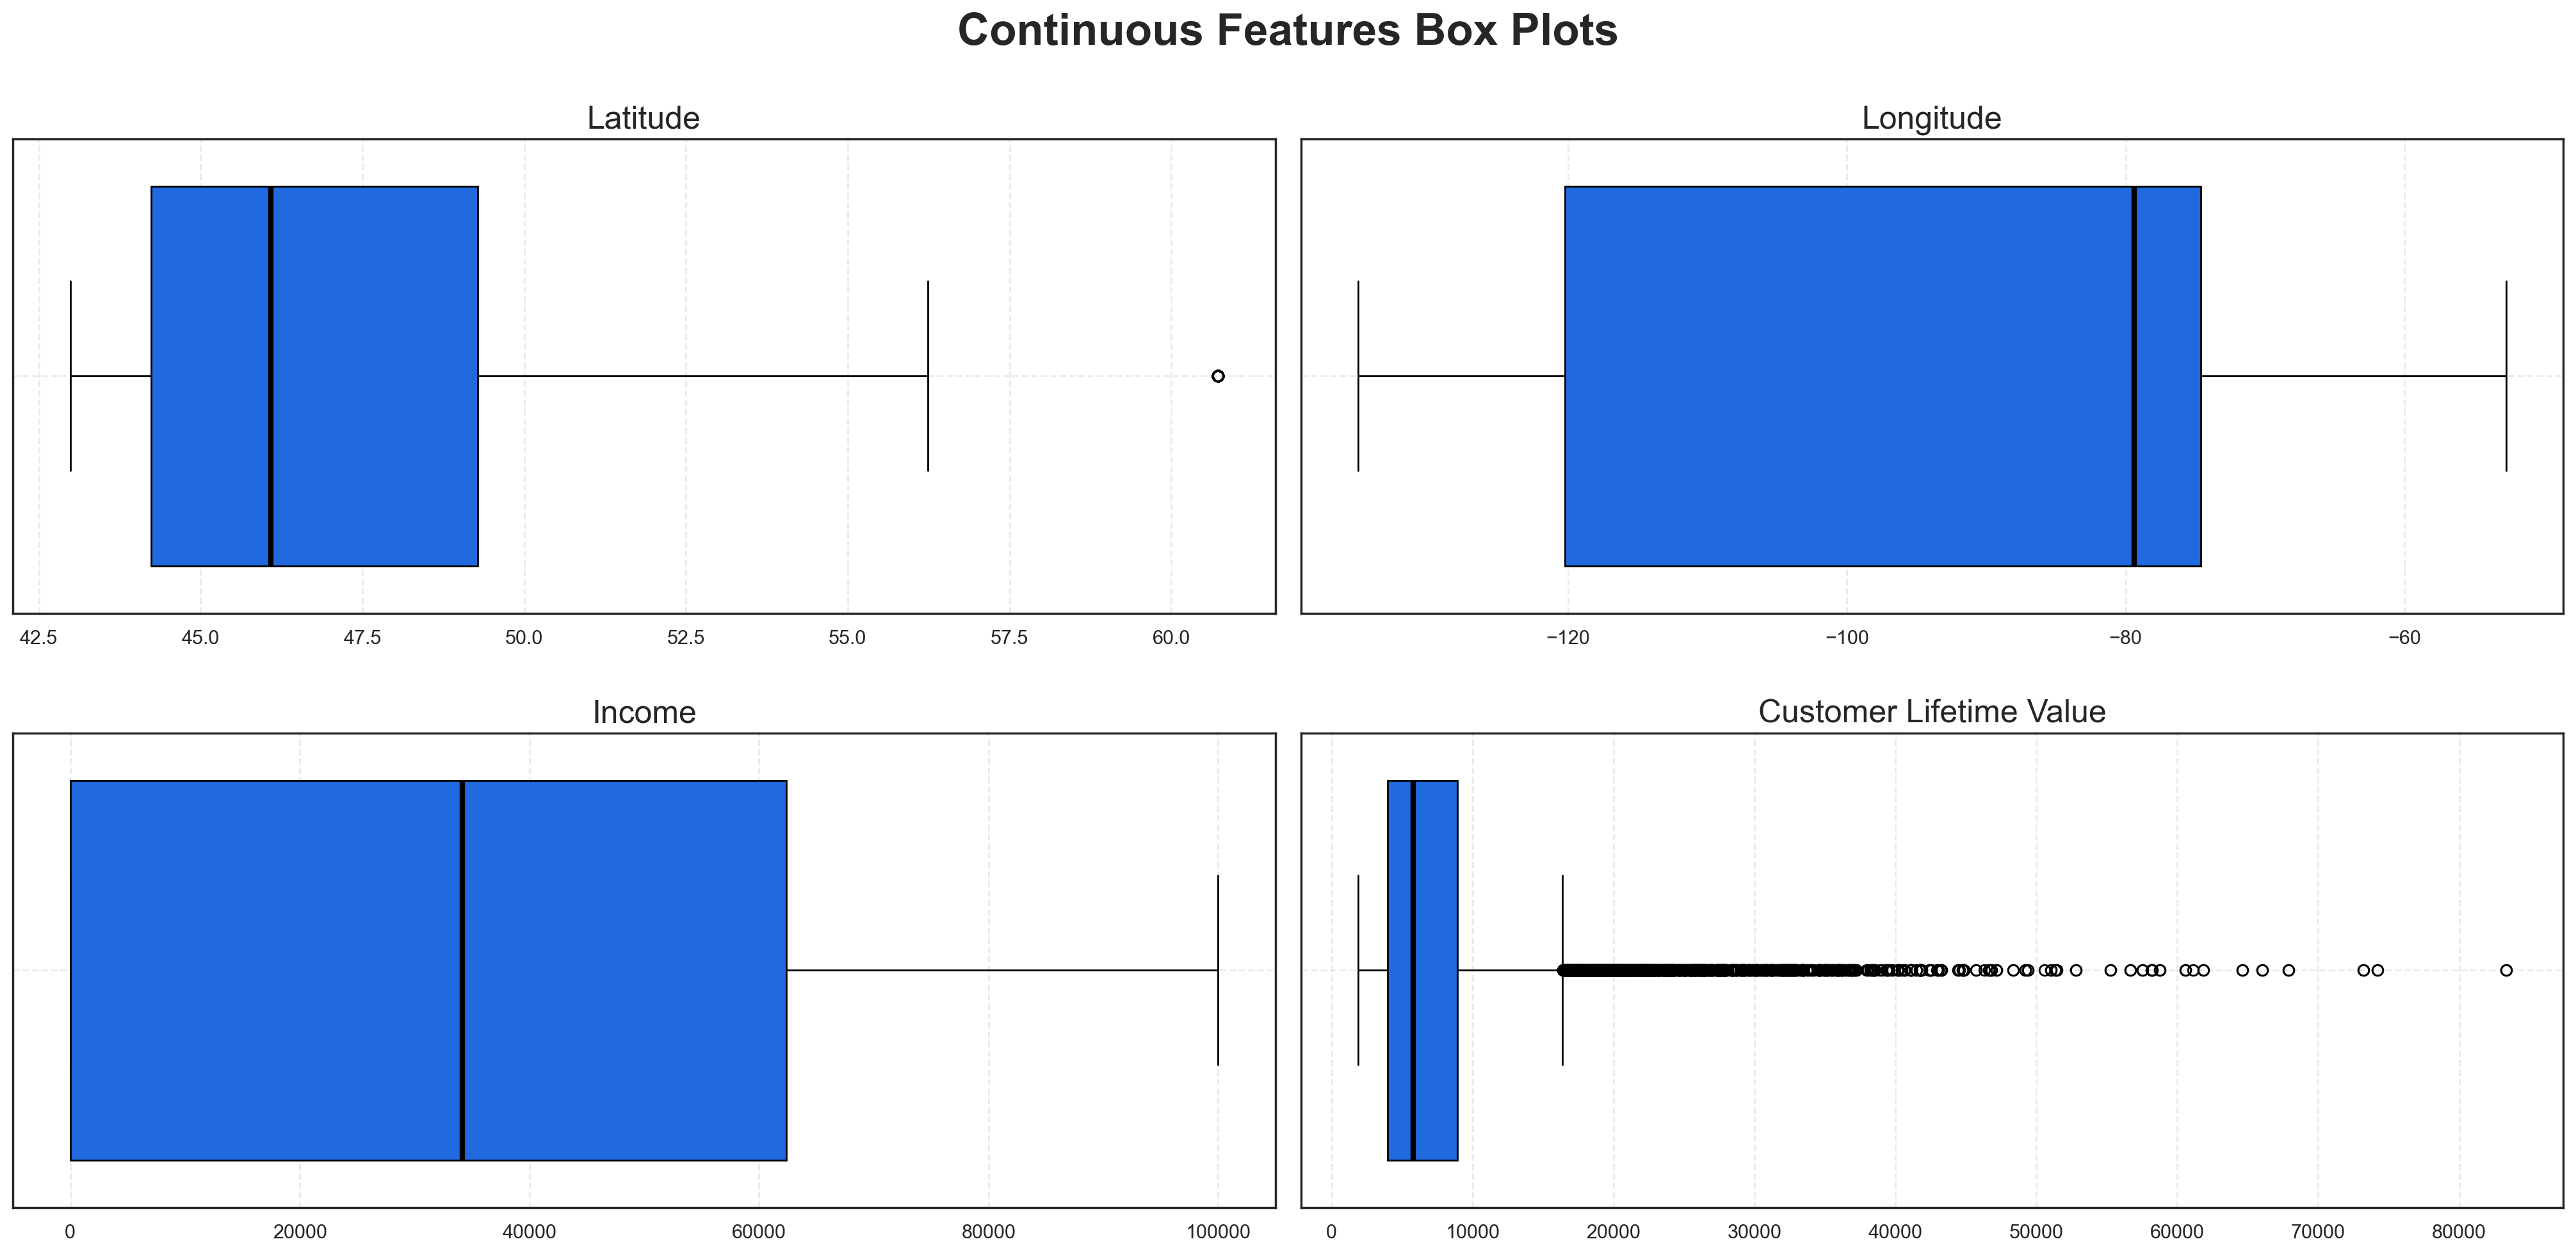

In [ ]:
# Create canvas with the same structure as before
fig, axes = plt.subplots(2, 
                         ceil(len(continuous_features_CDB ) / 2), 
                         figsize=(20, 10),
                         constrained_layout=True) # Adjust automatically spacing between subplot and labels 

# Increase vertical space between rows
fig.set_constrained_layout_pads(h_pad=.2)

# Plot data
# Iterate across axes objects and associate each box plot:
for ax, feat in zip(axes.flatten(), continuous_features_CDB):
    # We need to reset the index to avoid errors since we haven't dealt with duplicate values yet
    sns.boxplot(x=customerDB[feat], ax=ax, 
                # Set inside color to blue
                color="#0062FF",
                # Set line colors to black
                boxprops=dict(edgecolor="black"),
                whiskerprops=dict(color="black"),
                capprops=dict(color="black"),
                medianprops=dict(color="black", linewidth=3),
                flierprops=dict(markeredgecolor="black")) 
    
    # Put grid with low opacity and dashed line so it's visible, but not distracting
    ax.grid(True, linestyle="--", alpha=0.4)

    # Put title of each graph with bigger font
    ax.set_title(feat, fontsize=18)

    # Hide x label since we already have the boxlplot title at the top
    ax.set_xlabel("") 

# Layout
# Add a centered title to the figure and plot it
plt.suptitle("Continuous Features Box Plots", 
             fontsize = 25, fontweight="bold")

# Create the folder '../figures/eda' if it doesn't already exist
os.makedirs(os.path.join('..', 'figures', 'eda'), exist_ok=True)

# Save figure to a png file in the folder created before
plt.savefig(os.path.join('..', 'figures', 'eda', 'numeric_features_histograms.png'), dpi=200)

# Show plot
plt.show()

From the boxplots above we can conclude that:

- `Latitude:` The values range between ~43-56.5°, with most values on the higher latitudes and one outlier more up north.
- `Longitude:` Values between -140° and -55° with a lot of values on lower longitudes, no outliers.
- The combination of these two features tells us AIA's customers are from North America, more specifically from Canada and the northern states of the USA.
- `Income:` There is a wide range of salaries, a quarter of the customers have income close to zero and another quarter has low-mid income, which pulls the median down and provokes right skewness. No outliers.
- `Customer Lifetime Value:` It's always at least ~1000$ and has a median of around 6000$. Has a very right skewed distribution with lots of outliers that represent the customers that are very profitable and thus important for the company.

### **Yearly Enrollments and Cancellations Trends**

To better understand the evolution of customer acquisition and retention over time, we plotted the yearly number of enrollments and cancellations. These visualizations provide a clear view of how customer engagement has changed across the years, highlighting potential growth patterns, market expansions, or customer churn tendencies.

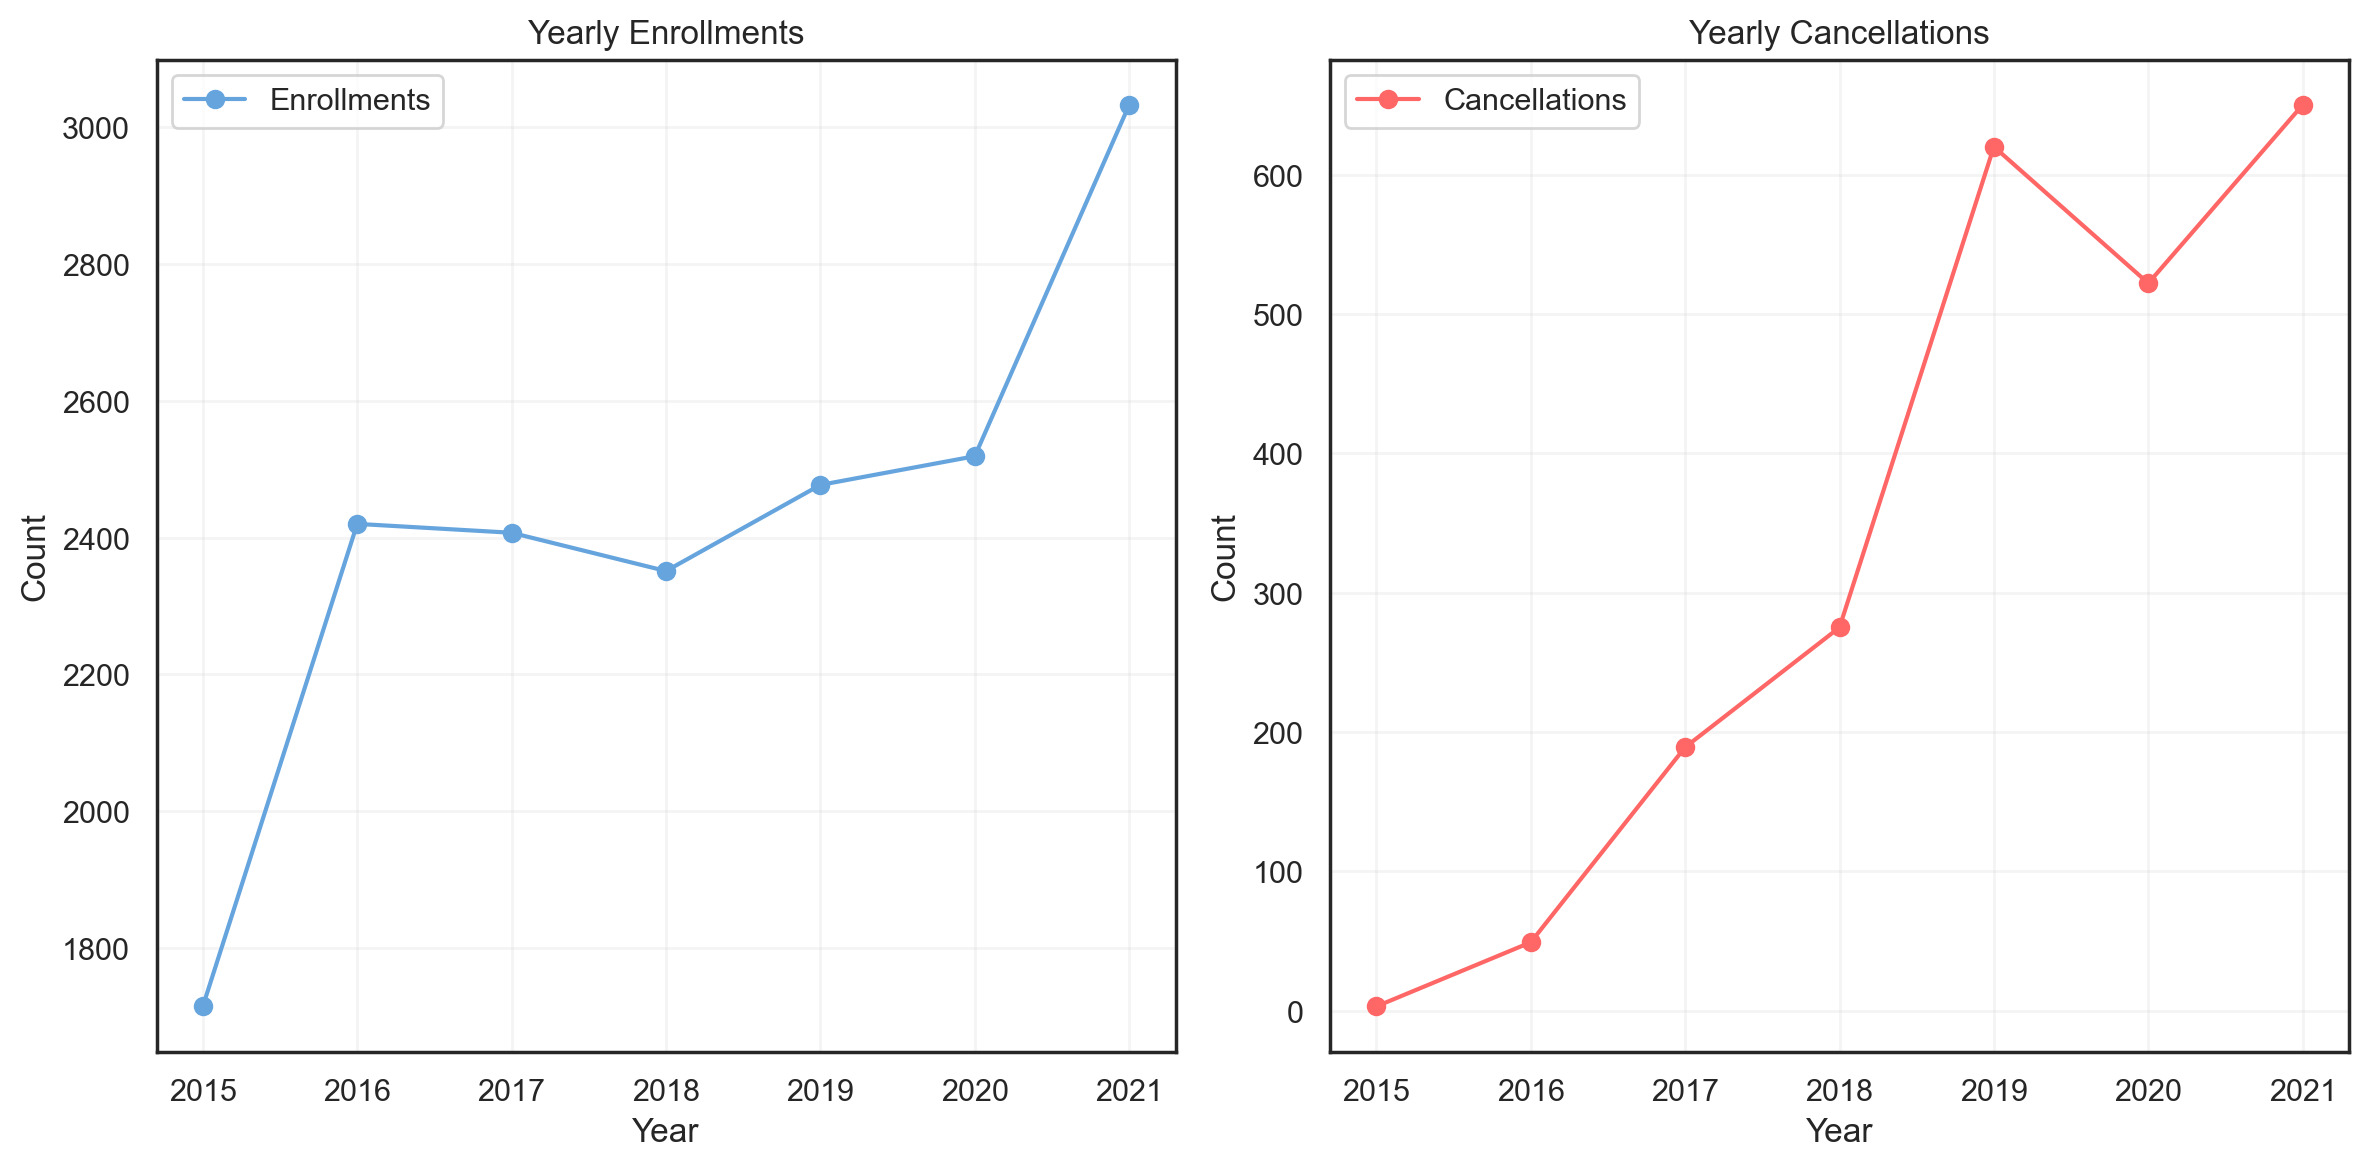

In [9]:
yearly_enrollment_counts = customerDB["EnrollmentYear"].value_counts().sort_index()
yearly_cancellation_counts = customerDB["CancellationYear"].value_counts().sort_index()

plt.figure(figsize=(12, 6))

plt.subplot(1,2,1)
plt.plot(yearly_enrollment_counts.index, yearly_enrollment_counts.values, marker='o', label='Enrollments', color='#66a4de')
plt.title("Yearly Enrollments")
plt.xlabel("Year")
plt.ylabel("Count")
plt.legend()
plt.grid(True, alpha=0.2)

plt.subplot(1,2,2)
plt.plot(yearly_cancellation_counts.index, yearly_cancellation_counts.values, marker='o', label='Cancellations', color='#ff6666')
plt.title("Yearly Cancellations")
plt.xlabel("Year")
plt.ylabel("Count")
plt.legend()
plt.grid(True, alpha=0.2)

plt.tight_layout()
plt.show()


From this new plots we can conclude that:

- `Yearly Enrollments plot:` Shows a relatively stable trend from 2016 to 2020, followed by a significant increase in 2021. This sharp rise likely corresponds to the 2021 promotional campaign observed earlier in the dataset, which successfully boosted new customer acquisitions.

- `Yearly Cancellations plot:` reveals a continuous upward trend from 2015 to 2021, with the highest cancellation rate also occurring in 2021. This pattern suggests that although customer acquisition increased, customer churn also grew proportionally, possibly as a side effect of attracting a large number of short-term or promotion-driven customers.

Overall, these trends indicate that the company experienced strong growth in 2021, but may need to further investigate retention strategies to reduce cancellations in the following periods.

## Relationship between Metric Features (CustomerDB)

### **Scatterplots**

Are used to explore the relationships between numerical features in the dataset. By plotting data points across two axes, they allow us to visualize how values vary together and to identify patterns such as correlations, groupings, or anomalies. This type of visualization helps reveal how different factors—like flight frequency, travel distance, and loyalty points—interact with one another. Overall, the scatterplots offer useful insights into customer behavior and help uncover possible trends and dependencies among features.

#### Initial Scatterplot

We start by performing a general and straightforward analysis of several relationships between features that could potentially be significant. Based on the results of this initial exploration, we then focus on examining in greater detail the relationships that appear to be the most informative or meaningful for further analysis.

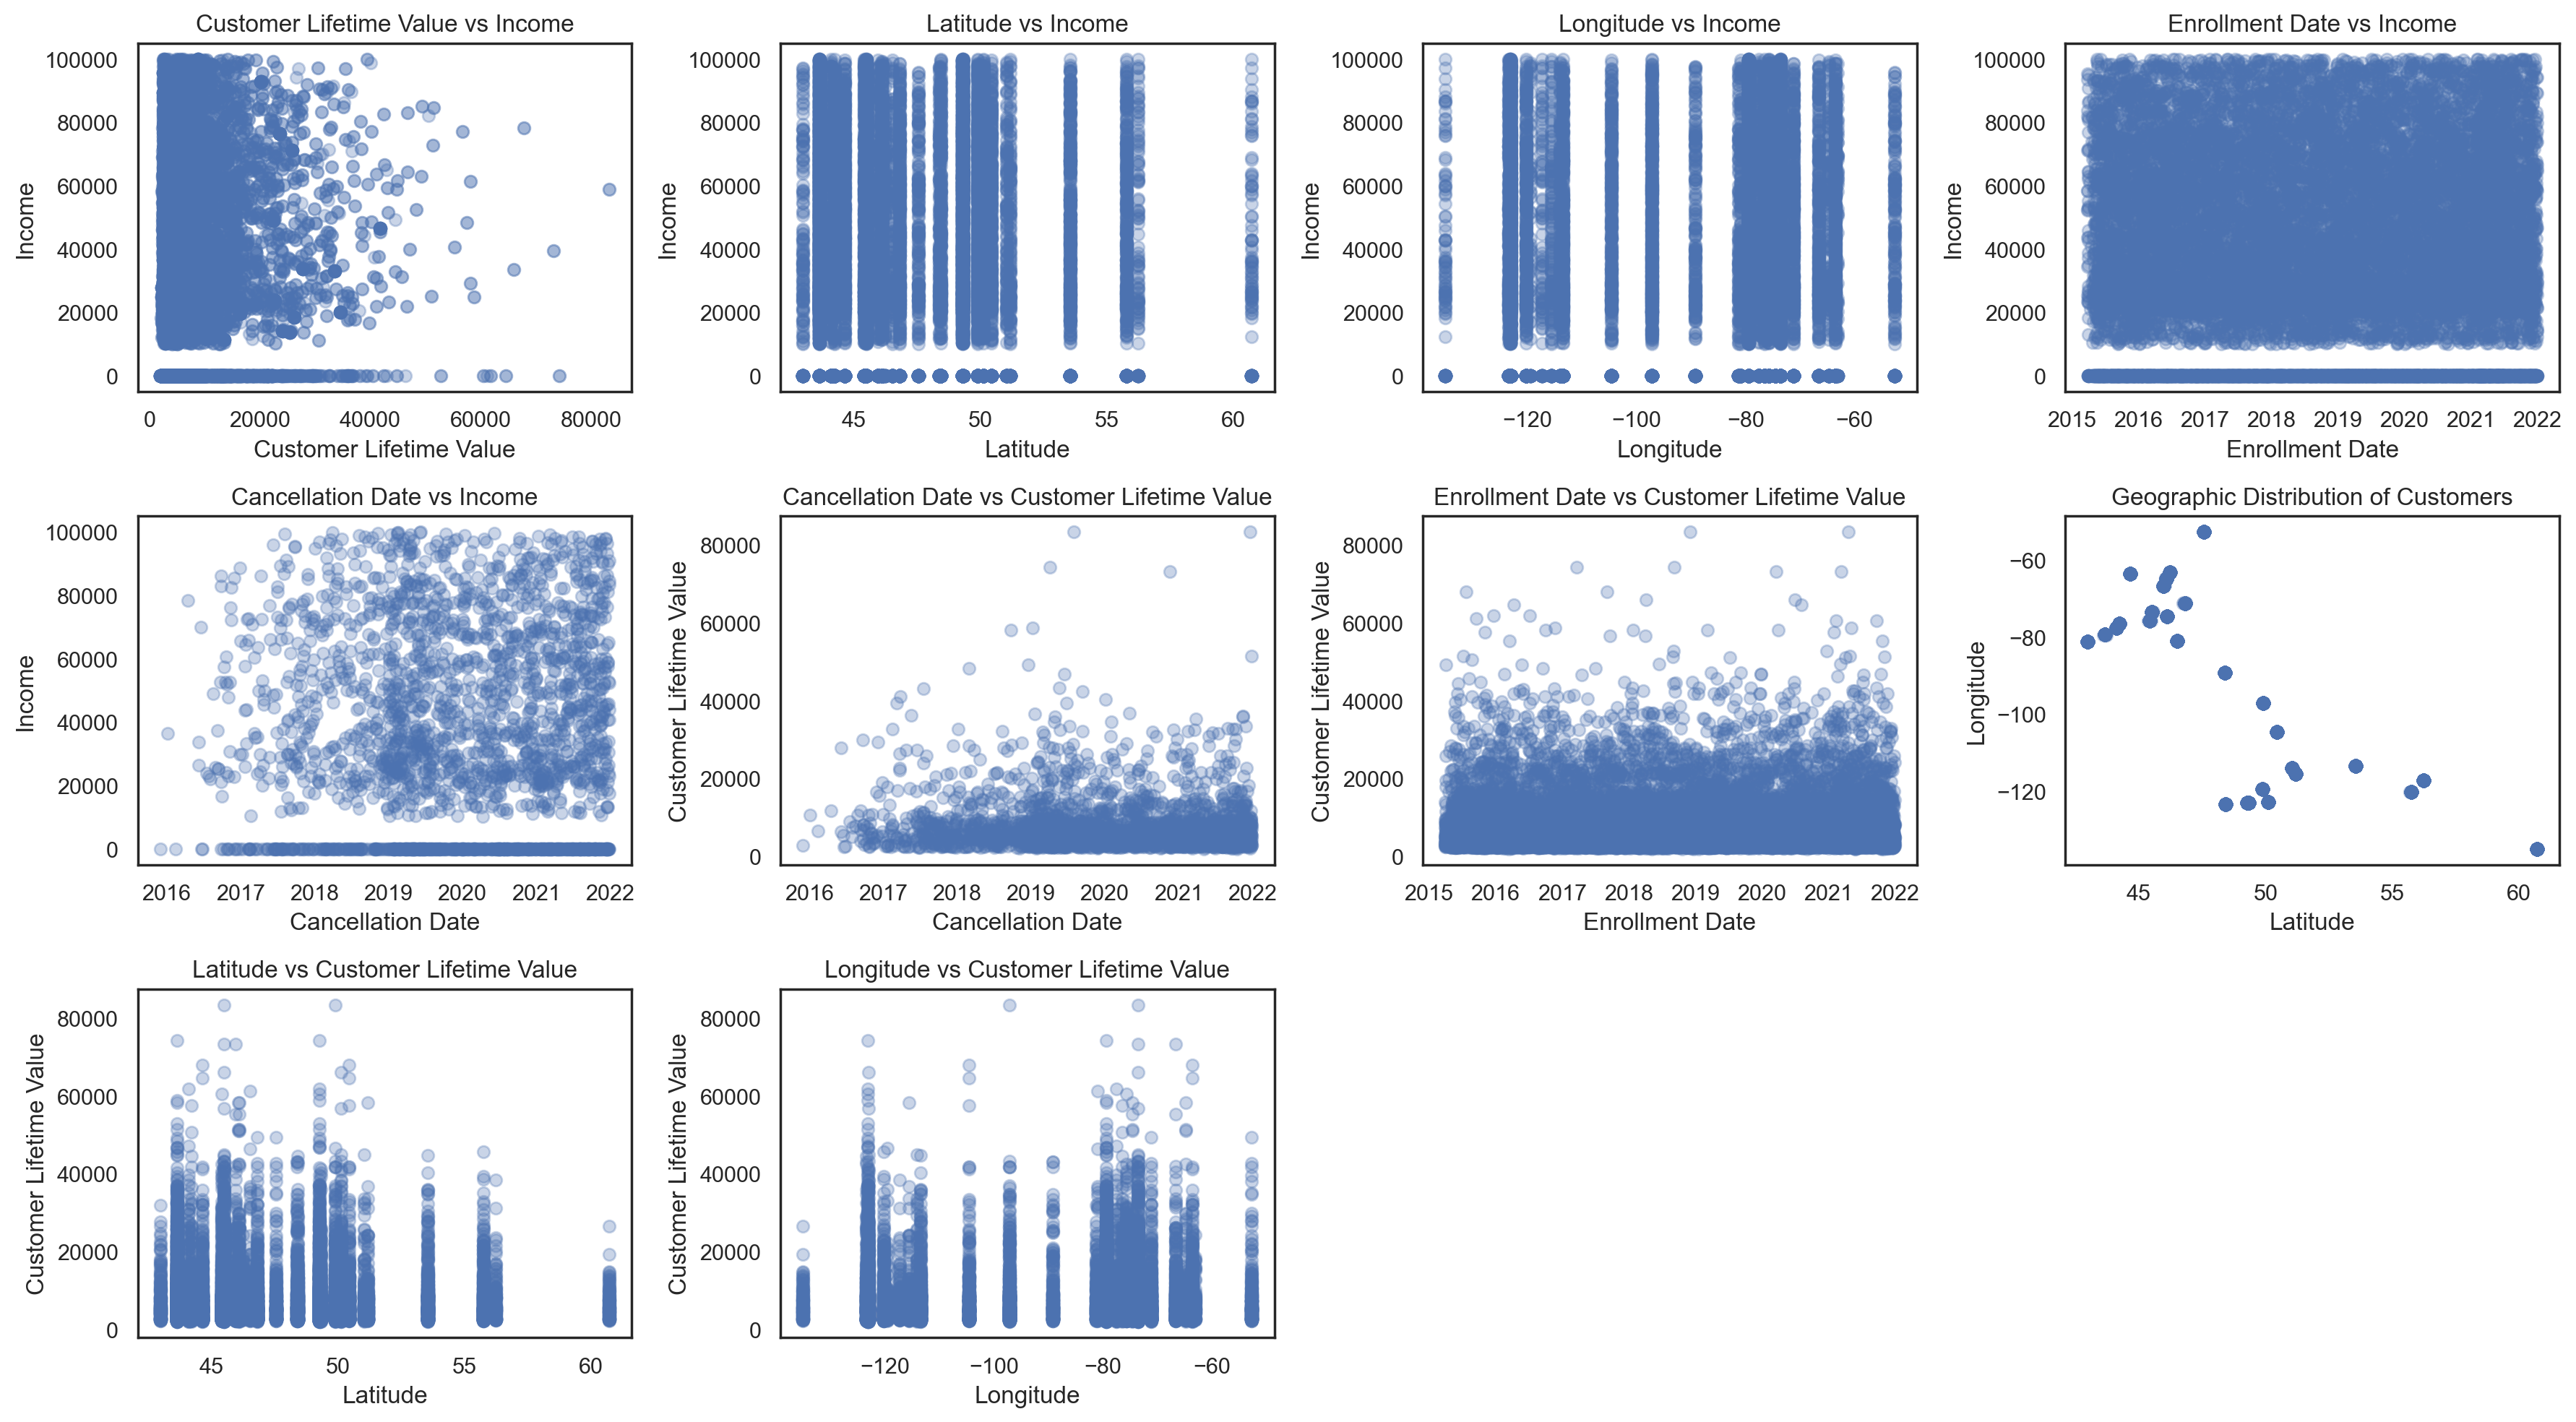

In [10]:
plt.figure(figsize=(18, 10))

# Customer Lifetime Value vs Income
plt.subplot(3, 4, 1)
plt.scatter(customerDB["Customer Lifetime Value"], customerDB["Income"], alpha=0.3)
plt.title("Customer Lifetime Value vs Income")
plt.xlabel("Customer Lifetime Value")
plt.ylabel("Income")

# Income vs Latitude
plt.subplot(3, 4, 2)
plt.scatter(customerDB["Latitude"], customerDB["Income"], alpha=0.3)
plt.title("Latitude vs Income")
plt.xlabel("Latitude")
plt.ylabel("Income")

#Income vs Longitude
plt.subplot(3, 4, 3)
plt.scatter(customerDB["Longitude"], customerDB["Income"], alpha=0.3)
plt.title("Longitude vs Income")
plt.xlabel("Longitude")
plt.ylabel("Income")

# Enrollment Date vs Income
plt.subplot(3, 4, 4)
plt.scatter(customerDB["EnrollmentDateOpening"], customerDB["Income"], alpha=0.3)
plt.title("Enrollment Date vs Income")
plt.xlabel("Enrollment Date")
plt.ylabel("Income")

# Cancellation Date vs Income
plt.subplot(3, 4, 5)
plt.scatter(customerDB["CancellationDate"], customerDB["Income"], alpha=0.3)
plt.title("Cancellation Date vs Income")
plt.xlabel("Cancellation Date")
plt.ylabel("Income")

#Cancelation Date vs Customer Lifetime Value
plt.subplot(3, 4, 6)
plt.scatter(customerDB["CancellationDate"], customerDB["Customer Lifetime Value"], alpha=0.3)
plt.title("Cancellation Date vs Customer Lifetime Value")
plt.xlabel("Cancellation Date")
plt.ylabel("Customer Lifetime Value")

#Enrollment Date vs Customer Lifetime Value
plt.subplot(3, 4, 7)
plt.scatter(customerDB["EnrollmentDateOpening"], customerDB["Customer Lifetime Value"], alpha=0.3)
plt.title("Enrollment Date vs Customer Lifetime Value")
plt.xlabel("Enrollment Date")
plt.ylabel("Customer Lifetime Value")

# Latitude vs Longitude
plt.subplot(3, 4, 8)
plt.scatter(customerDB["Latitude"], customerDB["Longitude"], alpha=0.3)
plt.title("Geographic Distribution of Customers")
plt.xlabel("Latitude")
plt.ylabel("Longitude")

# Customer Lifetime Value vs Latitude
plt.subplot(3, 4, 9)
plt.scatter(customerDB["Latitude"], customerDB["Customer Lifetime Value"], alpha=0.3)
plt.title("Latitude vs Customer Lifetime Value")
plt.xlabel("Latitude")
plt.ylabel("Customer Lifetime Value")

# Customer Lifetime Value vs Longitude
plt.subplot(3, 4, 10)
plt.scatter(customerDB["Longitude"], customerDB["Customer Lifetime Value"], alpha=0.3)
plt.title("Longitude vs Customer Lifetime Value")
plt.xlabel("Longitude")
plt.ylabel("Customer Lifetime Value")

plt.tight_layout()
plt.show()


The general scatterplot overview provided a first look at how numerical features relate to one another within the CustomerDB dataset.
Although the data have not yet been cleaned, several preliminary insights emerged:
- The relationship between Income and Customer Lifetime Value appears weak, but some customers with higher income levels do achieve higher lifetime values.
- Geographical features (Latitude and Longitude) show clear clustering, indicating that customer locations are recorded at a regional.
- Temporal features (Enrollment and Cancellation Dates) are spread throughout the observed period, suggesting consistent customer acquisition and churn over time.
- Some data quality issues are visible, such as overlapping points and potential zeros.

Even though these findings are exploratory, they already help define the directions for deeper analysis. In the next stage, we will concentrate on specific scatterplots that display patterns likely to provide valuable insights into customer behavior and the connections between flight activity, loyalty points, and redemption value.

#### **Latitude vs Longitude**

Now we examine individually the relationship between customers’ recorded latitude and longitude values. Exploring this spatial distribution helps us visualize geographic patterns, identify clusters of customer locations, and gain insights into regional travel behaviors or market concentration.

/var/folders/s9/nfpy2jls4ps2k_p8lpjz6_yr0000gn/T/ipykernel_72916/3987941910.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


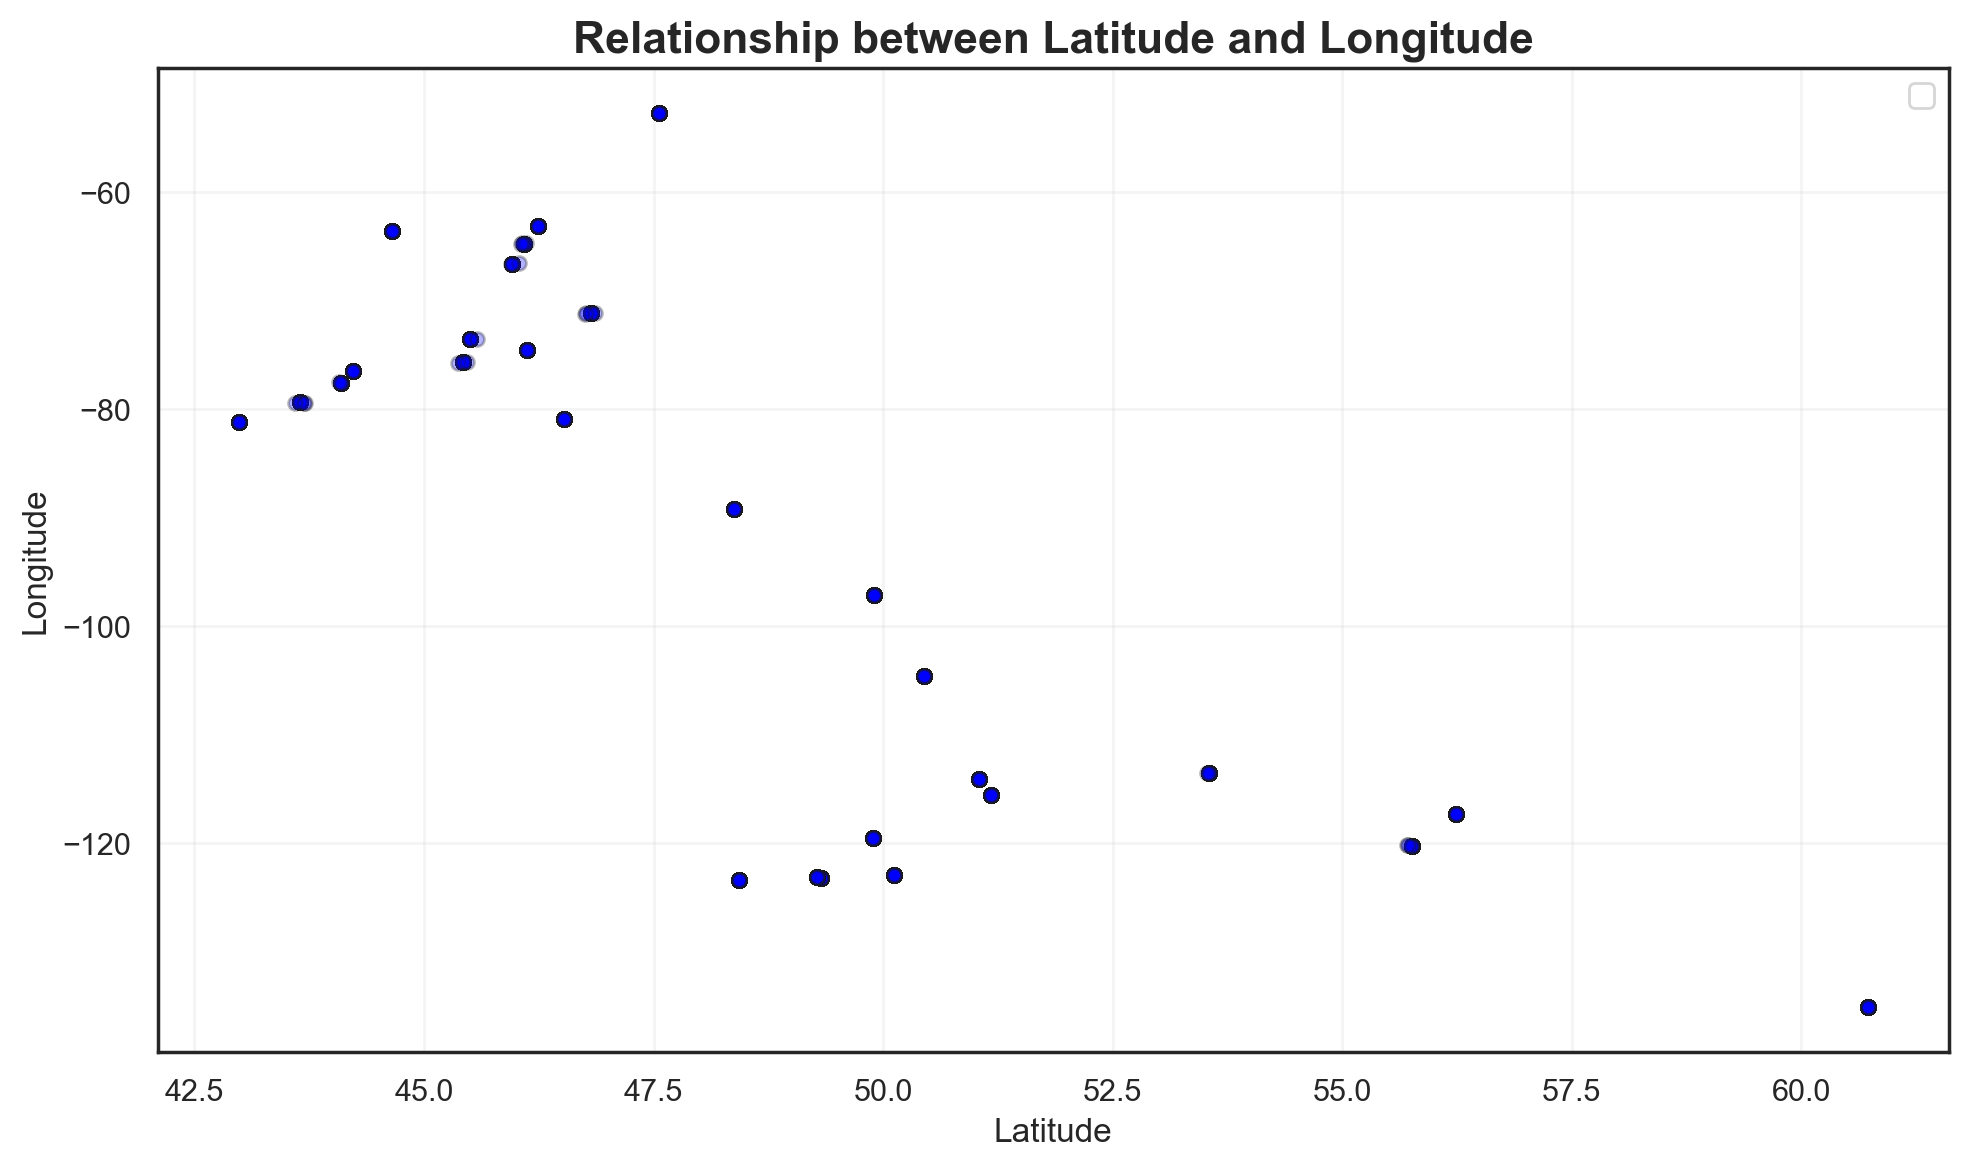

In [11]:
x = customerDB["Latitude"]
y = customerDB["Longitude"]

sns.set_style("white")
plt.figure(figsize=(10, 6))
plt.scatter(x, y, s=25, alpha=0.3, c='blue', edgecolor='k')
plt.title("Relationship between Latitude and Longitude", fontsize=16, fontweight='bold')
plt.xlabel("Latitude") 
plt.ylabel("Longitude") 
plt.legend()
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()

The graph is very underwhelming. We were expecting lots of data, but looks like there are very few Latitude-Longitude points, which doesn't allow us to make much conclusions.

In [12]:
lat_count = customerDB["Latitude"].count()
long_count = customerDB["Longitude"].count()

print(f"Latitude has {lat_count} values.")
print(f"Longitude has {long_count} values.")

Latitude has 16921 values.
Longitude has 16921 values.


In [13]:
lat_duplicated = customerDB["Latitude"].duplicated().sum()
long_duplicated = customerDB["Longitude"].duplicated().sum()

print(f"The Latitude column has {lat_duplicated} duplicated values, which represents {(lat_duplicated/lat_count*100).round(2)}% of the total data.")
print(f"The Longitude column has {long_duplicated} duplicated values, which represents {(long_duplicated/long_count*100).round(2)}% of the total data.")

The Latitude column has 16872 duplicated values, which represents 99.71% of the total data.
The Longitude column has 16872 duplicated values, which represents 99.71% of the total data.


This explains why we had so few points in the scatter plot. Let's see what exactly are the values.

In [14]:
customerDB[["Latitude","Longitude"]].value_counts()

Latitude   Longitude  
43.653225  -79.383186     3387
49.282730  -123.120740    2600
45.501690  -73.567253     2064
49.895138  -97.138374      676
50.116322  -122.957360     586
44.648766  -63.575237      541
45.421532  -75.697189      516
53.544388  -113.490930     510
44.101128  -77.576309      490
46.813877  -71.207977      481
55.759628  -120.237660     441
45.963589  -66.643112      432
50.445210  -104.618900     412
44.231171  -76.485954      406
46.118462  -74.596184      399
48.428421  -123.365650     391
45.428730  -75.713364      363
49.328625  -123.160190     315
48.380894  -89.247681      258
47.561508  -52.712578      258
46.522099  -80.953033      229
46.087818  -64.778229      215
51.048615  -114.070850     193
51.178398  -115.570800     190
42.984924  -81.245277      176
56.234180  -117.289380     113
60.721188  -135.056840     112
49.887951  -119.496010      80
46.238239  -63.131069       67
45.365906  -75.723181        1
43.690489  -79.436758        1
55.751178  -120.

By searching what these coordinates represent on Google Maps, we conclude they identify the city the customer is from and not their exact location, probably for privacy reasons.
For example, the first 3 coordinates represent Toronto, Vancouver and Montreal, which are all Canadian cities.

Since we already have a column that represents the name of the city the customer is from, we conclude the **columns for Latitude and Longitude are redundant**.

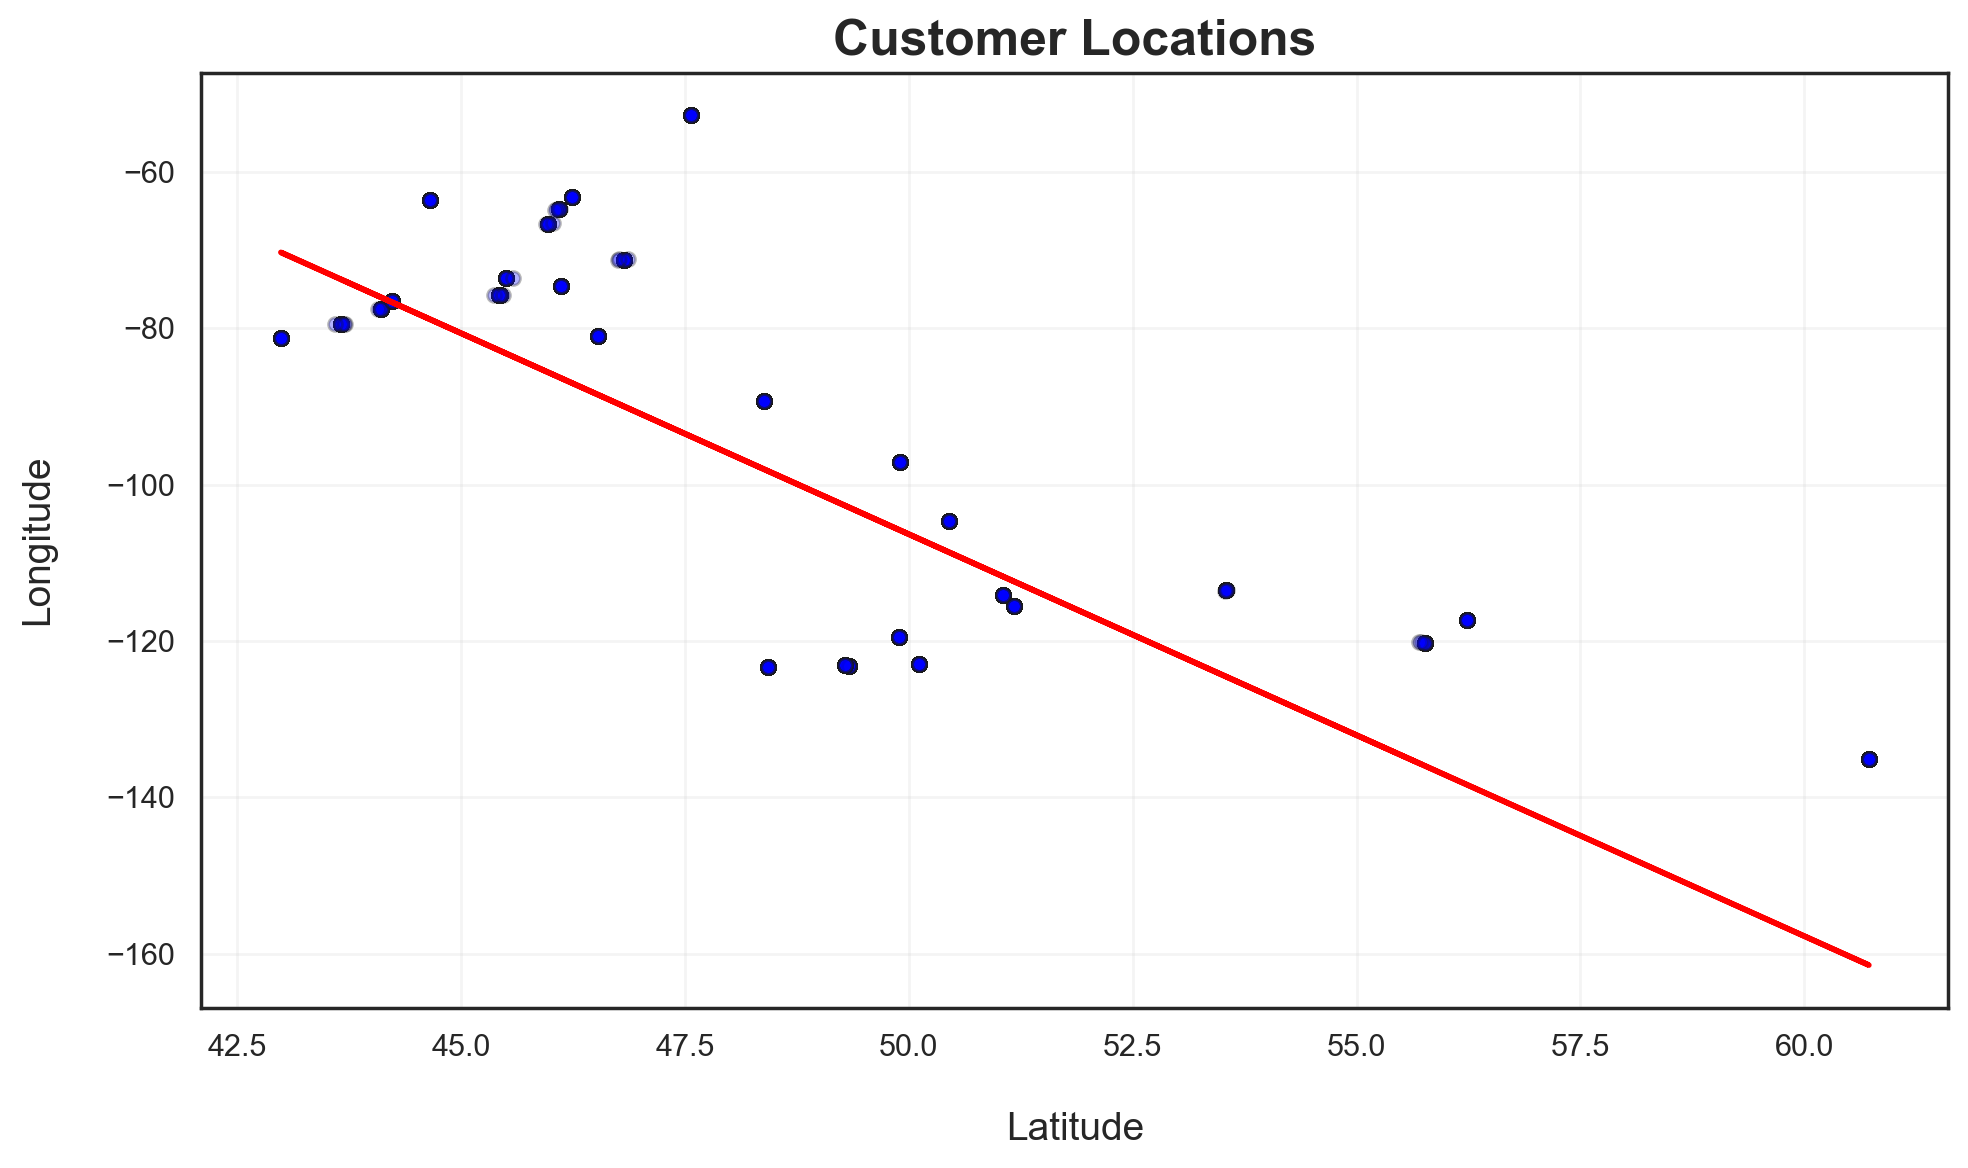

In [15]:
import numpy as np

x = customerDB["Latitude"]
y = customerDB["Longitude"]

# Scatter plot as before
plt.figure(figsize=(10, 6))
sns.set_style("white")
plt.scatter(x, y, s=25, alpha=0.3, c='blue', edgecolor='k')

# Fit a linear trend line
coeffs = np.polyfit(x, y, 1)
trend = np.poly1d(coeffs)
plt.plot(x, trend(x), color='red', linewidth=2)  # Line

plt.title("Customer Locations", fontsize=18, fontweight='bold')
plt.xlabel("Latitude", fontsize=14, labelpad=18)
plt.ylabel("Longitude", fontsize=14, labelpad=18)
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()


Plotting a trend line on the scatter plot, we can see a version of the geographic distribution of the cities. From this, we can say there are two main clusters of cities: the ones in the northeast and the ones in the southwest.

The trendline represents a link between the two groups of cities and could represent some routes of the flights taken.

To complement the analysis of the graphs above, we used a two-dimensional density plot (KDE plot), which allows us to visualize the areas with the highest concentration of points based on the Longitude and Latitude coordinates.

<Axes: xlabel='Longitude', ylabel='Latitude'>

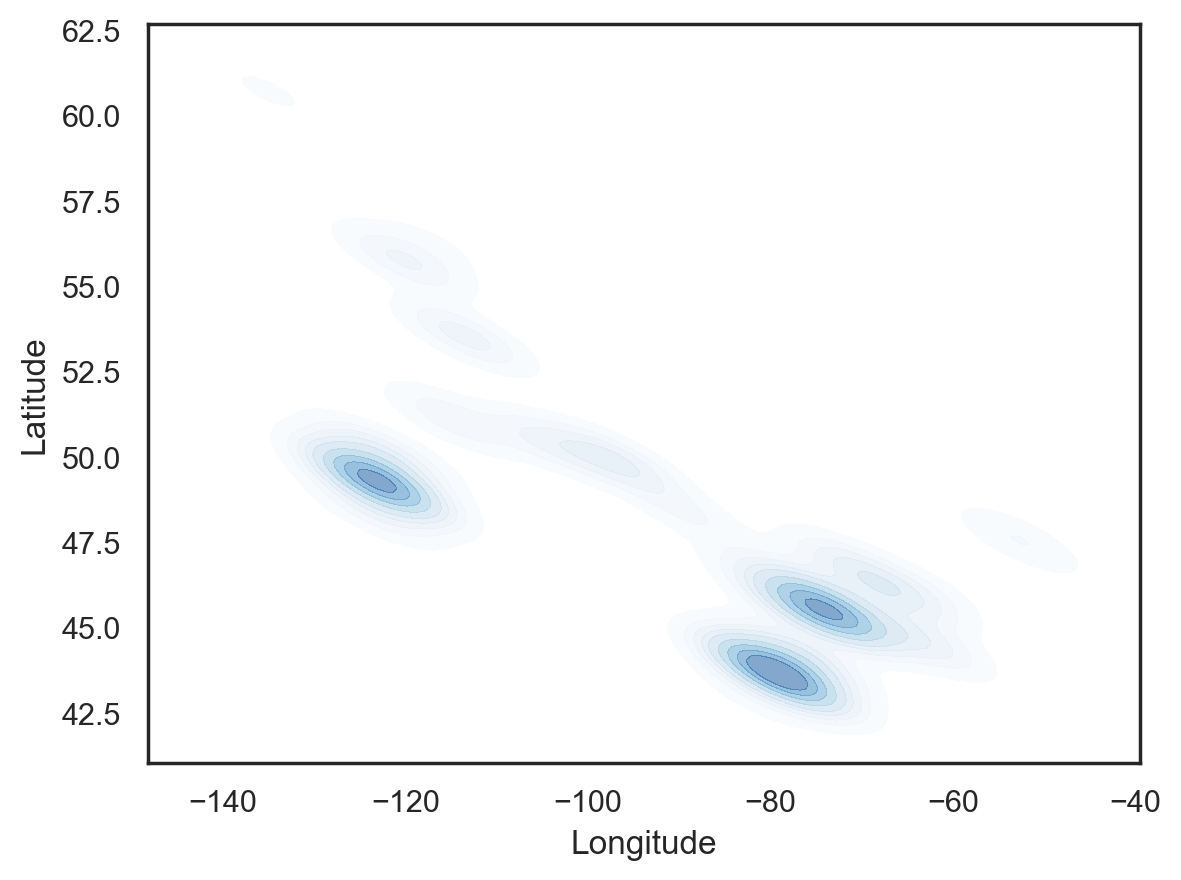

In [16]:
sns.kdeplot(data=customerDB, x='Longitude', y='Latitude', fill=True, cmap='Blues', alpha=0.5)

Through the graph, it is possible to confirm once again the previously identified concentration. It can be observed that the darker areas (with higher density) correspond to the regions previously highlighted as the main customer hubs, thus validating the detected geographical patterns.

#### **Customer Lifetime Value and Income**

Given the business context, it is important to understand whether a customer's income is linked to their overall value for the company, as measured by Customer Lifetime Value. By analyzing the relationship between these two features, we can uncover whether higher-income clients tend to generate more revenue and loyalty over time. Identifying such patterns can guide targeted marketing strategies or segmentation in later project stages.

To ensure the analysis is based on valid and meaningful data, we first removed any records with missing values or zero income. We then use a scatter plot to visualize the association between income and Customer Lifetime Value.

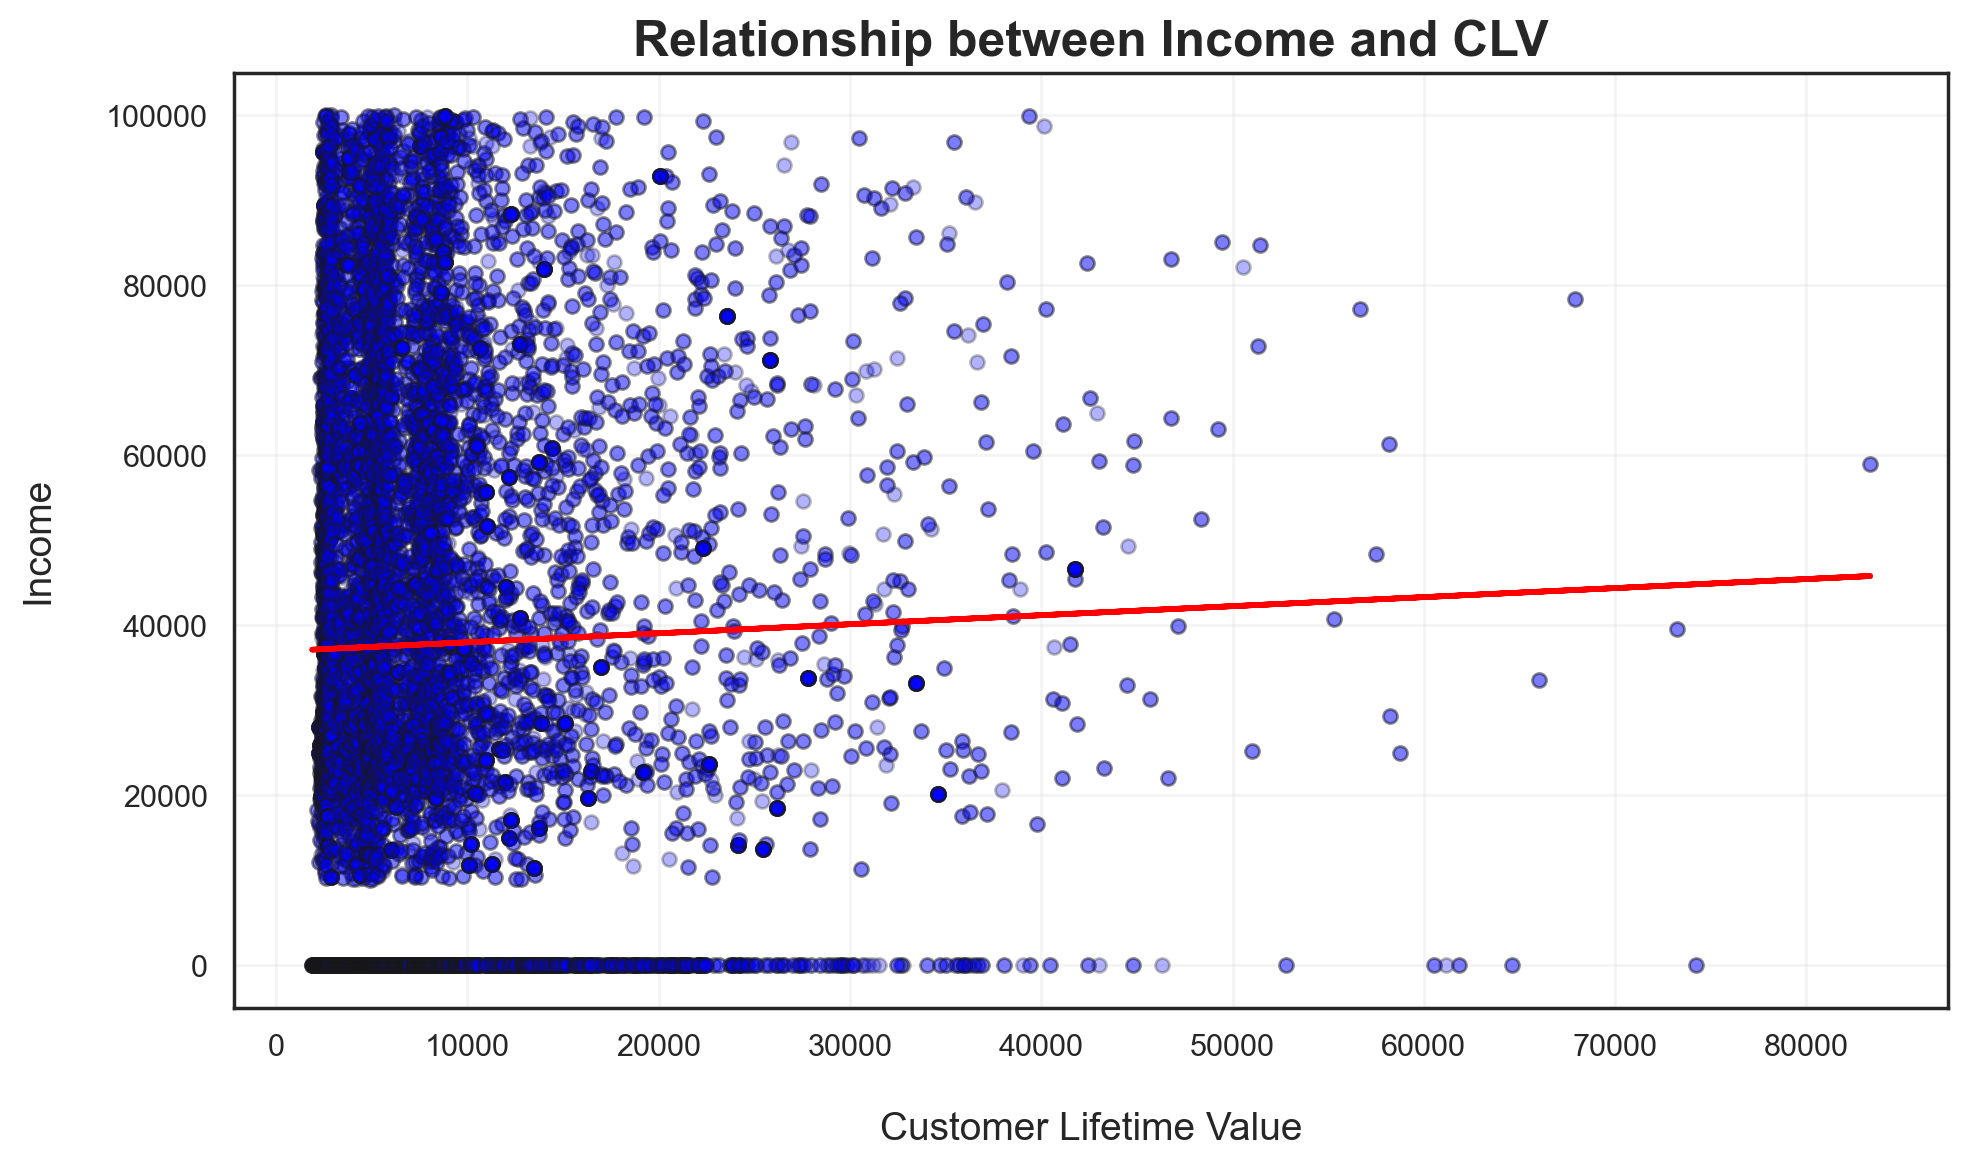

In [17]:
mask = (
    customerDB["Income"].notna() &
    (customerDB["Income"] >= 0) &
    customerDB["Customer Lifetime Value"].notna()
)

income_clean = customerDB.loc[mask, "Income"]
clv_clean = customerDB.loc[mask, "Customer Lifetime Value"]

plt.figure(figsize=(10, 6))
sns.set_style("white")
plt.scatter(clv_clean, income_clean, s=25, alpha=0.3, c='blue', edgecolor='k')

# Fit a linear trend line only on valid data
coeffs = np.polyfit(clv_clean, income_clean, 1)
trend = np.poly1d(coeffs)
plt.plot(clv_clean, trend(clv_clean), color='red', linewidth=2)

plt.title("Relationship between Income and CLV", fontsize=18, fontweight='bold')
plt.xlabel("Customer Lifetime Value", fontsize=14, labelpad=18)
plt.ylabel("Income", fontsize=14, labelpad=18)
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()


There is no clear relationship between customer income and Customer Lifetime Value (CLV) in this dataset. Across all income levels, there is a wide spread of CLV values, indicating that income is not a predictive factor for overall customer value. This suggests that other factors beyond income drive long-term customer engagement and spending.

### **Hexbinplots**

Hexbin plots will serve as an additional visualization method. They offer a more detailed representation of data density and distribution, making it easier to detect clusters, concentration zones, and underlying patterns that might not be as evident in standard scatterplots.

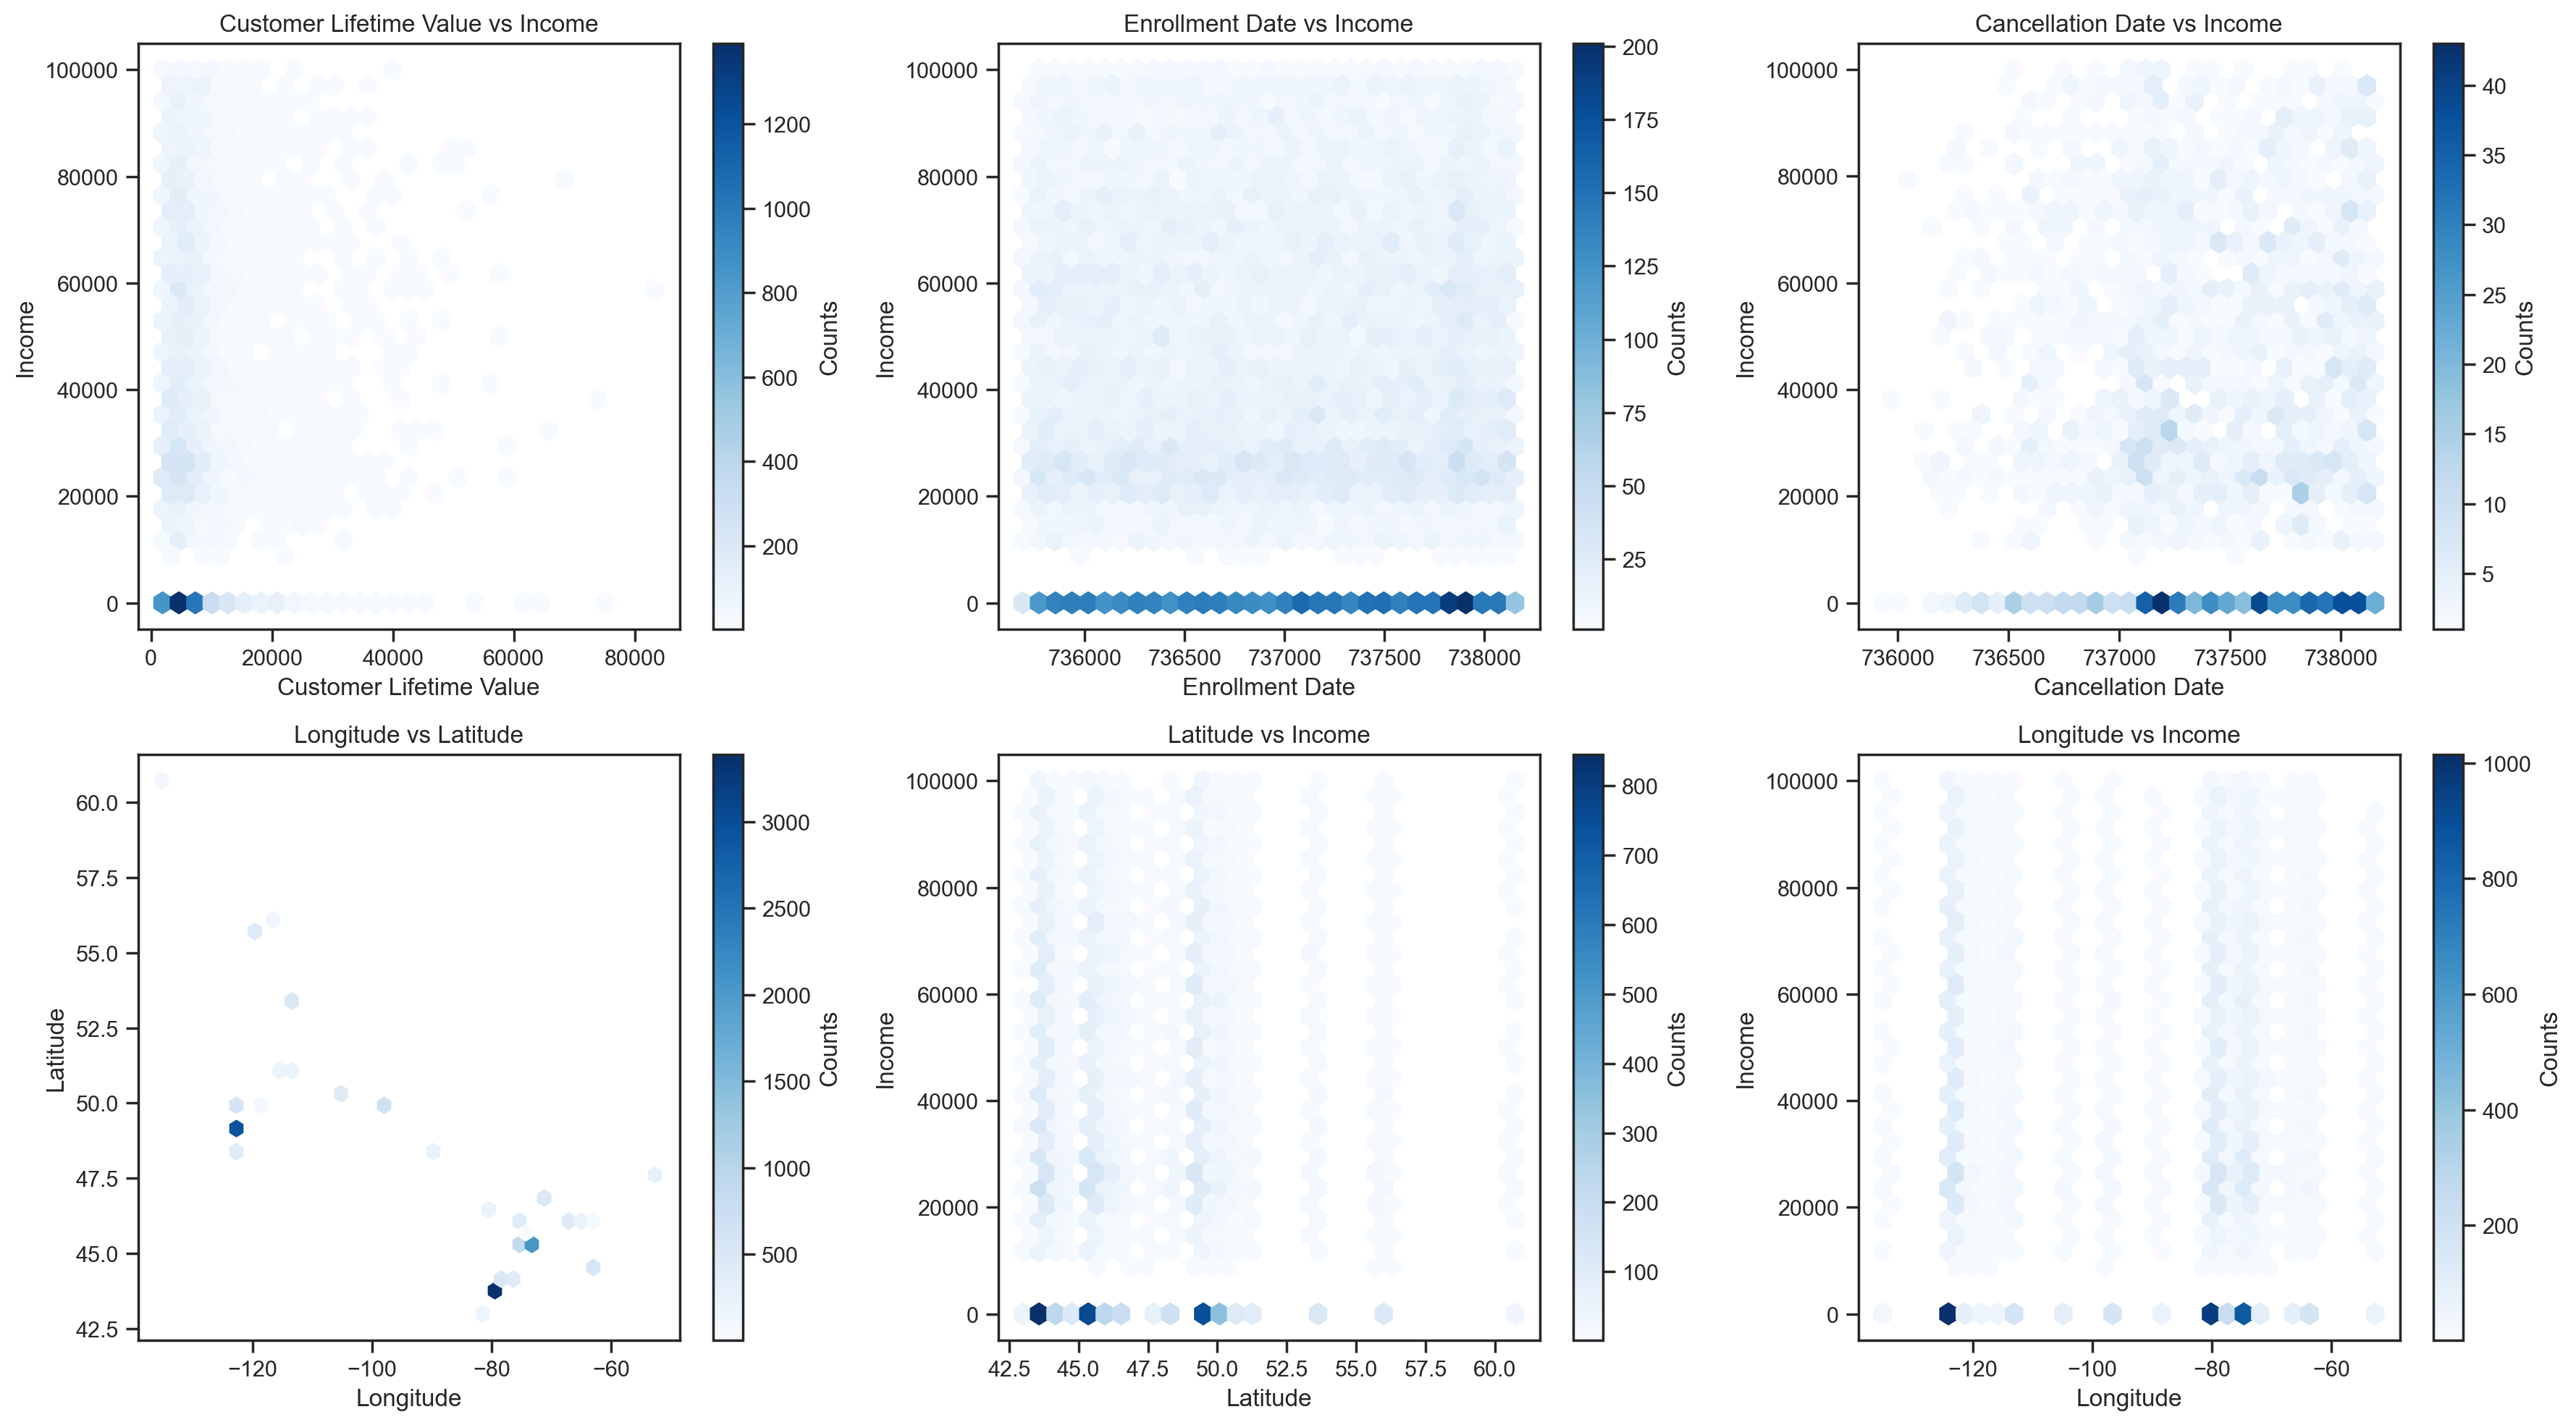

In [18]:
sns.set_style('ticks')
plt.figure(figsize=(18, 10))

# Income vs Customer Lifetime Value
plt.subplot(2, 3, 1)
plt.hexbin(customerDB["Customer Lifetime Value"], customerDB["Income"], gridsize=30, cmap="Blues", mincnt=1)
plt.title("Customer Lifetime Value vs Income")
plt.xlabel("Customer Lifetime Value")
plt.ylabel("Income")
plt.colorbar(label="Counts")

# Enrollment Date Opening vs Income
enrollment_ordinal = customerDB["EnrollmentDateOpening"].map(lambda x: x.toordinal()) # Convert EnrollmentDate to ordinal for regression, because the function that it's used needs numerical input
plt.subplot(2, 3, 2)
plt.hexbin(enrollment_ordinal, customerDB["Income"], gridsize=30, cmap="Blues", mincnt=1)
plt.title("Enrollment Date vs Income")
plt.xlabel("Enrollment Date")
plt.ylabel("Income")
plt.colorbar(label="Counts")

# Cancellation Date vs Income
cancellation_ordinal = customerDB["CancellationDate"].map(
    lambda x: x.toordinal() if pd.notna(x) else np.nan
) # Convert CancellationDate to ordinal for regression, because the function that it's used needs numerical input and handle NaT values
plt.subplot(2, 3, 3)
plt.hexbin(cancellation_ordinal, customerDB["Income"], gridsize=30, cmap="Blues", mincnt=1)
plt.title("Cancellation Date vs Income")
plt.xlabel("Cancellation Date")
plt.ylabel("Income")
plt.colorbar(label="Counts")

# Longitude vs Latitude
plt.subplot(2, 3, 4)
plt.hexbin(customerDB["Longitude"], customerDB["Latitude"], gridsize=40, cmap="Blues", mincnt=1)
plt.title("Longitude vs Latitude")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.colorbar(label="Counts")

# Latitude vs Income
plt.subplot(2, 3, 5)
plt.hexbin(customerDB["Latitude"], customerDB["Income"], gridsize=30, cmap="Blues", mincnt=1)
plt.title("Latitude vs Income")
plt.xlabel("Latitude")
plt.ylabel("Income")
plt.colorbar(label="Counts")

# Longitude vs Income
plt.subplot(2, 3, 6)
plt.hexbin(customerDB["Longitude"], customerDB["Income"], gridsize=30, cmap="Blues", mincnt=1)
plt.title("Longitude vs Income")
plt.xlabel("Longitude")
plt.ylabel("Income")
plt.colorbar(label="Counts")

plt.tight_layout()
plt.show()


The results show that data points are highly concentrated near zero values for income and lifetime value, suggesting a large number of customers with limited or missing financial data. The distributions appear mostly uniform, with no evident linear or non-linear relationships between the features.
The geographic hexbin plot (Longitude vs Latitude) indicates that customers are primarily clustered within specific regions, consistent with the expected concentration around major populated areas, but no additional insights can be drawn without mapping contextual information.

## Categorical visualizations (CustomerDB)

Before separating the metric and categorical features, it was necessary to filter out those that do not provide analytical insights.
features such as First Name, Last Name, Customer Name, and Postal Code were excluded, as they act merely as unique identifiers and do not contribute to understanding customer behavior or analytical patterns.
Now we will analyze the rest of the features.

### **Bar Plots**

The bar plot overview provides a general understanding of the categorical and discrete features in the CustomerDB dataset.
It helps identify dominant categories, potential imbalances, and overall data distribution before moving to more detailed analyses.

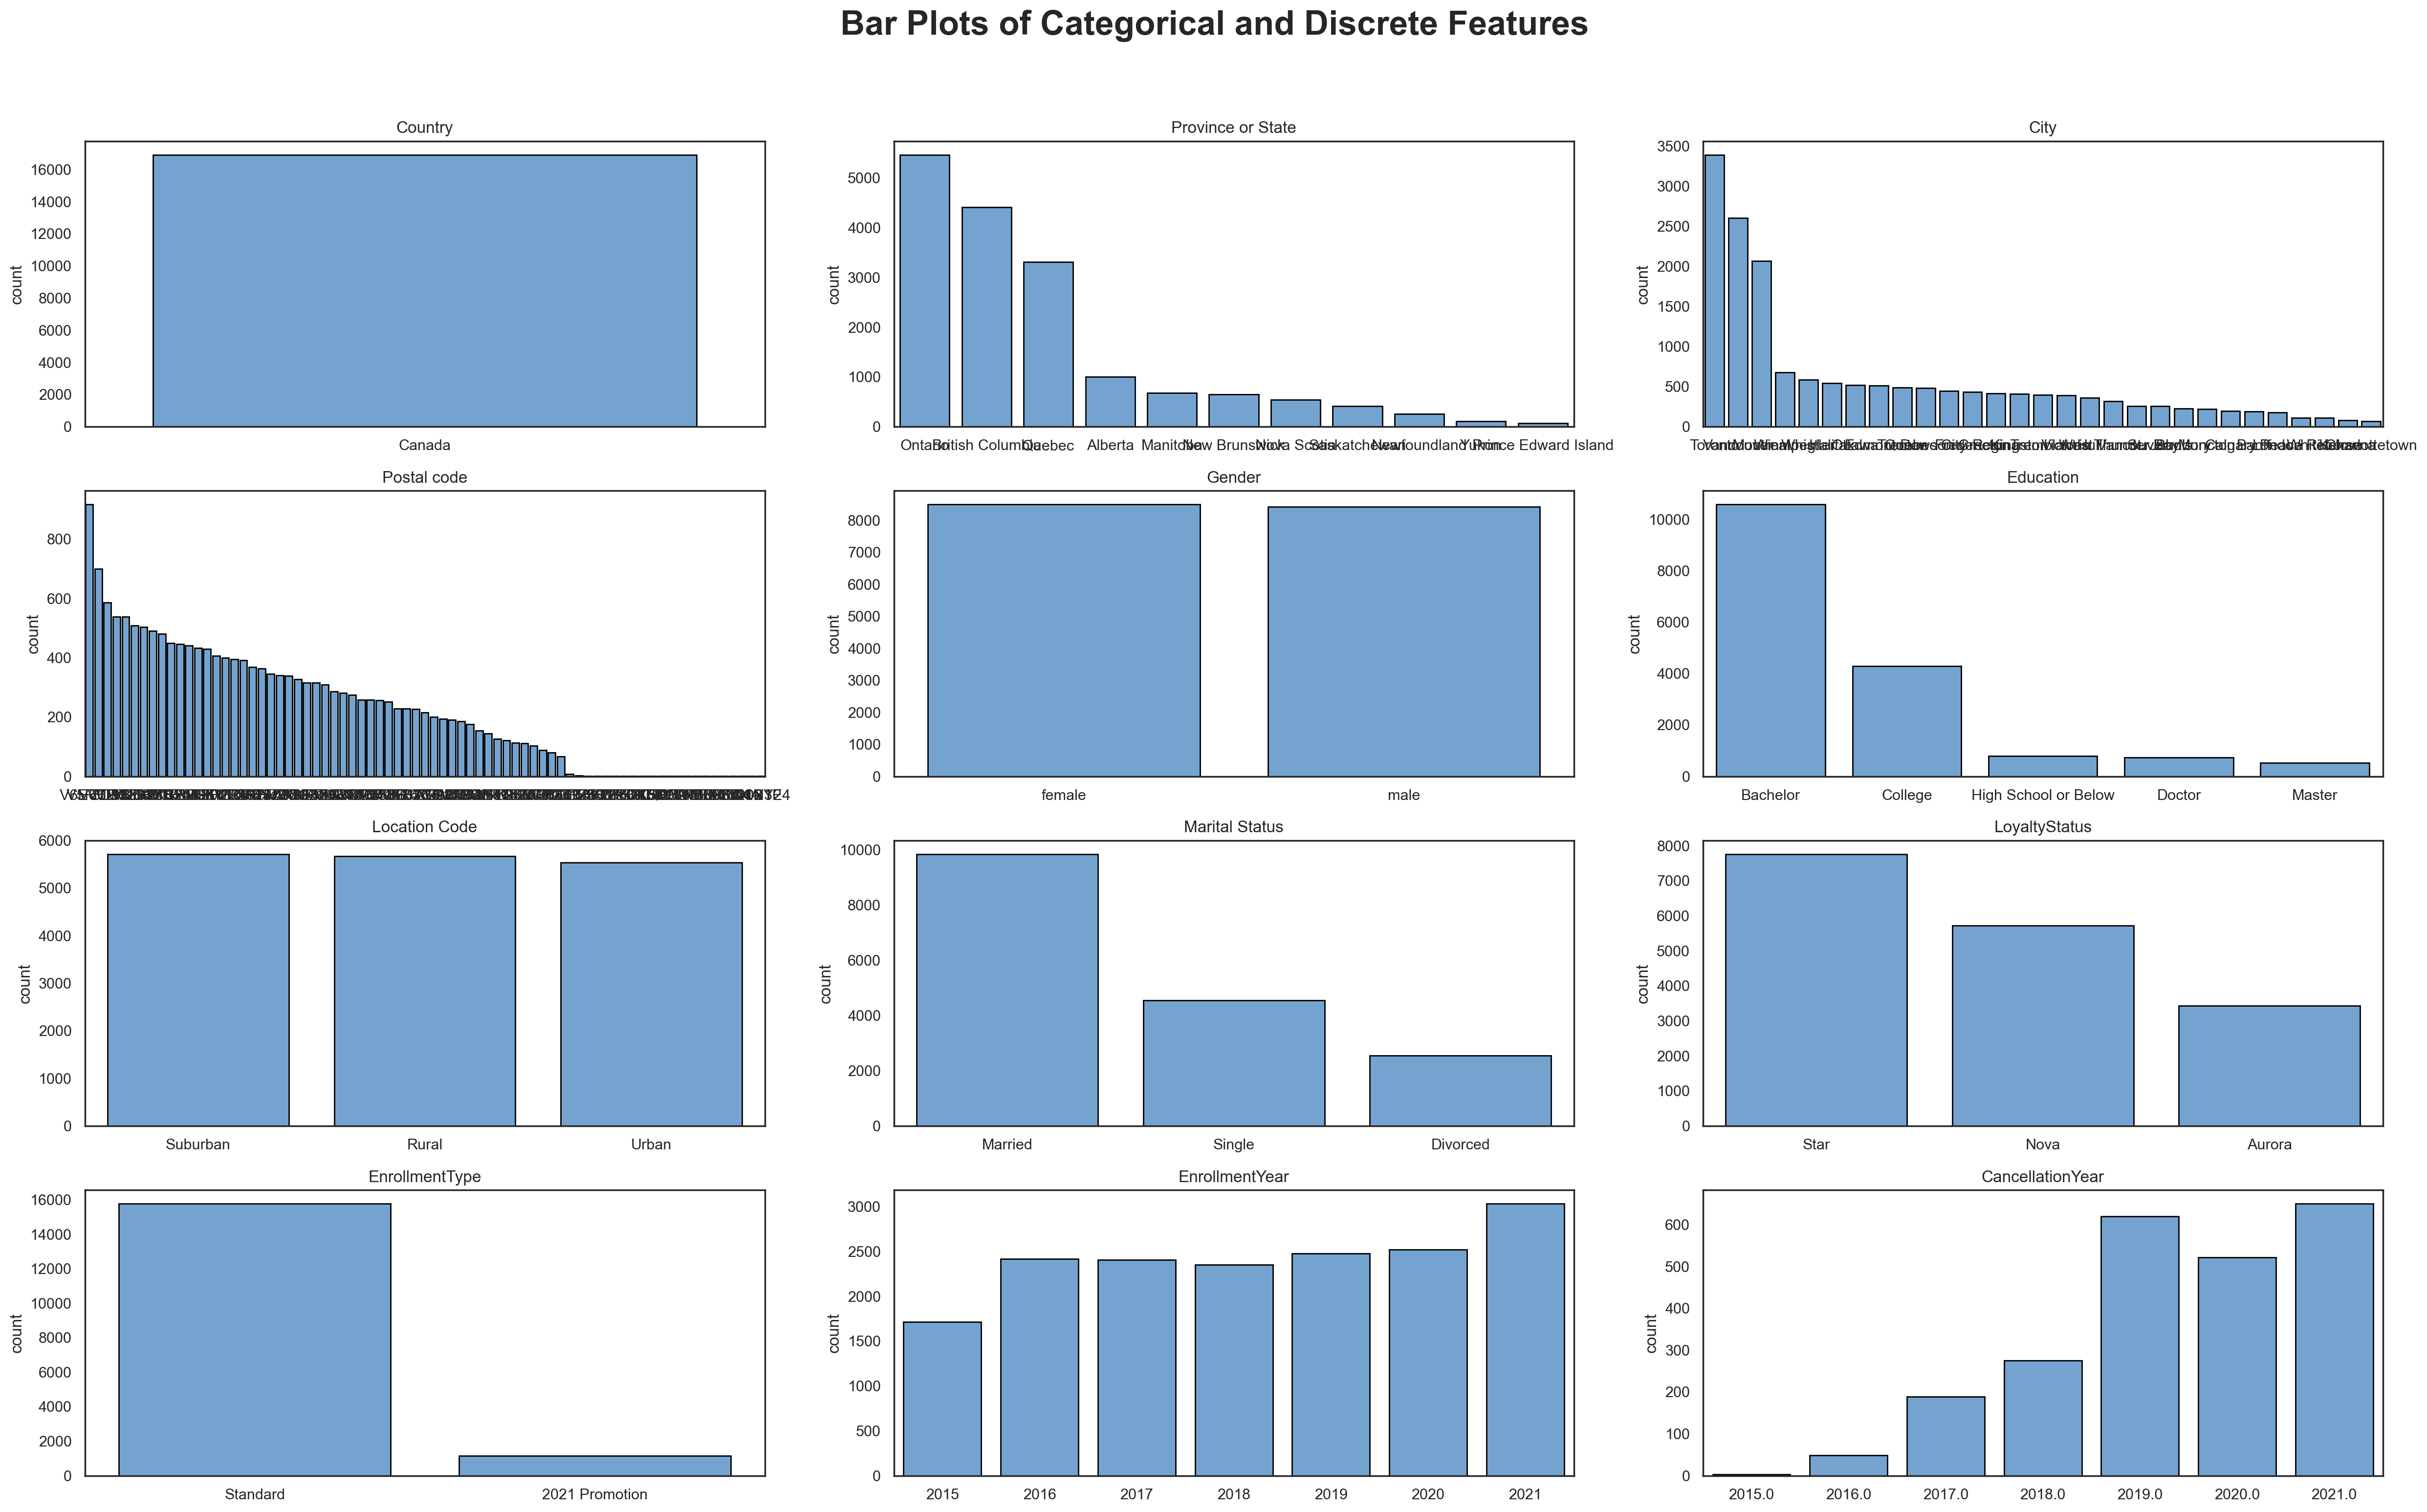

In [19]:
# To do bar plots we use Categorical + Discrete features + dates features
bar_plot_features = categorical_features_CDB[3:] + discrete_features_CDB # "[3:]" Exclude first name, last name, customer name cause they will not enter in our plots

sns.set(style="white")

fig, axes = plt.subplots(4, 3, figsize=(25, 15))

for ax, feat in zip(axes.flatten(), bar_plot_features):

    # The follow code defines the order of the values for the features EnrollmentYear and CancellationYear
    # In this way we can analyze the years in chronological order
    if pd.api.types.is_numeric_dtype(customerDB[feat]):
        order_vals = sorted(customerDB[feat].dropna().unique())
    else:
        order_vals = customerDB[feat].value_counts().index

    # Cria o gráfico
    sns.countplot(
        x=customerDB[feat],
        ax=ax,
        order=order_vals,
        color="#66a4de",
        edgecolor="black"
    )
    ax.set_title(feat, fontsize=12)
    ax.set_xlabel('') # Remove x-axis label for clarity

plt.suptitle("Bar Plots of Categorical and Discrete Features",
             fontsize=25, fontweight="bold", y=1.03)

plt.tight_layout()# Adjust spacing to prevent overlap
plt.show()


Most features present relatively balanced or interpretable distributions. For instance, Gender is well distributed, Marital Status and Education show more pronounced differences, with Married and Bachelor being the most common categories, respectively.

The the Postal Code, although it was included for completeness, the resulting plot confirms that this variable is highly granular, containing a large number of unique values. This makes it unsuitable for meaningful categorical visualization, as the plot becomes overcrowded and difficult to interpret.

The LoyaltyStatus variable also indicates a clear tier hierarchy, with Star being the most frequent status, followed by Nova and Aurora, which aligns with typical loyalty program structures.
In terms of EnrollmentType, the majority of customers joined through the Standard method, with only a small portion coming from the 2021 Promotion, indicating a limited campaign impact or a short promotional period.

Regarding EnrollmentYear and CancellationYear distributions suggest a steady inflow of new customers throughout the years, with visible cancellations occurring mainly from 2018 onwards, increasing toward 2021.
For further analysis, broader geographic groupings such as City or Province/State will be preferred, offering clearer regional insights.

Overall, these bar plots serve as an initial diagnostic step, highlighting the main categorical structures of the dataset. In the next phase, specific features with business relevance, such as LoyaltyStatus, Education, Marital Status, and EnrollmentType, will be explored in greater depth to extract more actionable insights.

Following the general overview of categorical features, we will now perform a more detailed analysis focusing on the City and Province or State features.
These two geographic features were selected because they offer valuable insights into customer distribution and potential regional differences in behavior and value.
While the initial bar plots already indicated strong variation across cities and provinces, their high number of categories made the overall patterns difficult to interpret.

<span style="font-size:20px;"><b>
City
</b>

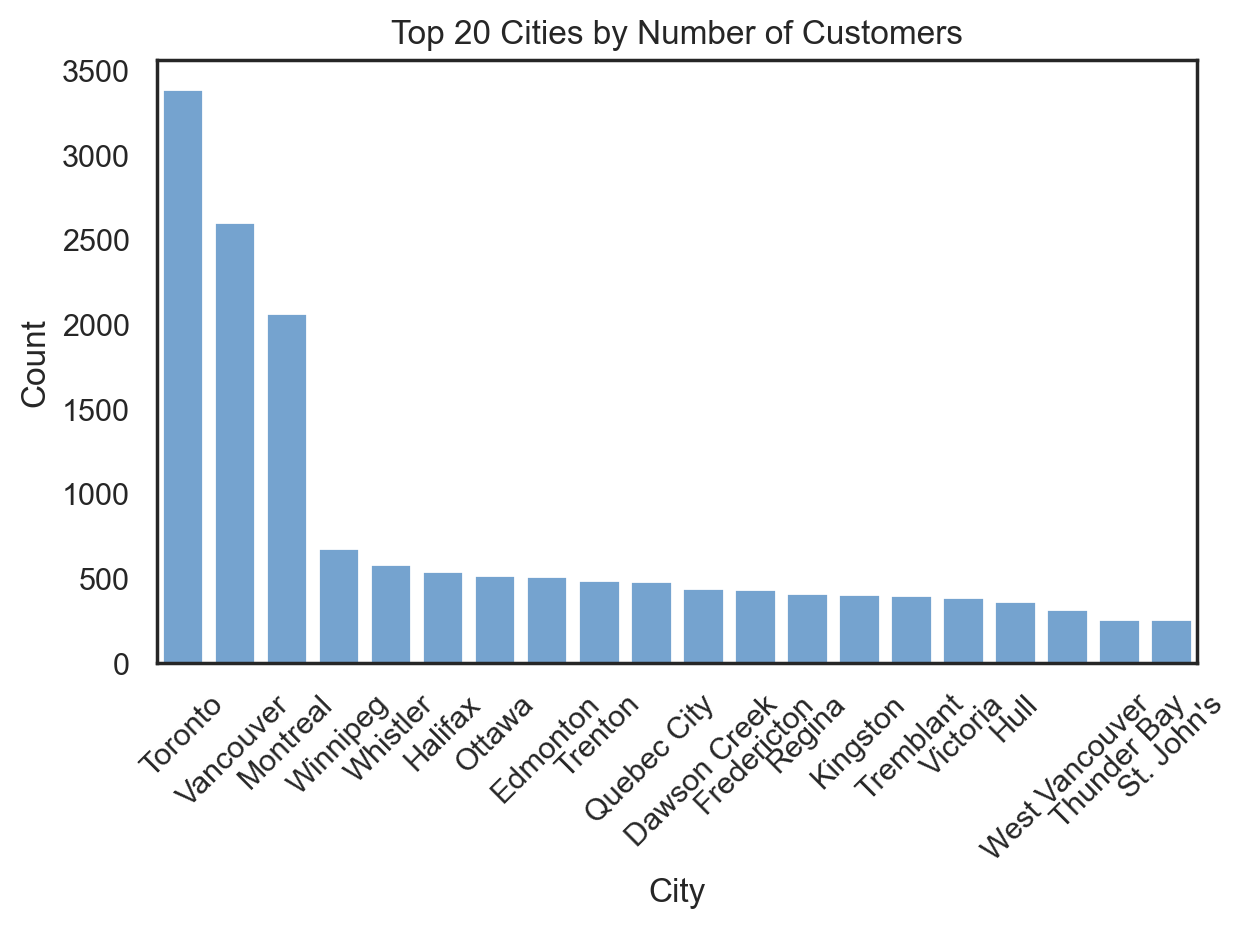

In [20]:
top_cities = customerDB["City"].value_counts().nlargest(20).index

sns.countplot(
    x="City",
    data=customerDB[customerDB["City"].isin(top_cities)],
    order=top_cities,    
    color="#66a4de"
)
plt.title("Top 20 Cities by Number of Customers")
plt.xlabel("City")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The chart reveals that Toronto, Vancouver, and Montreal are the top three cities with the highest number of customers. This indicates that the company’s customer base is strongly concentrated in major urban centers, particularly in Ontario and Quebec. These cities should therefore be considered key markets for targeted marketing and customer retention initiatives.

<span style="font-size:20px;">
<b> Province or State <b>

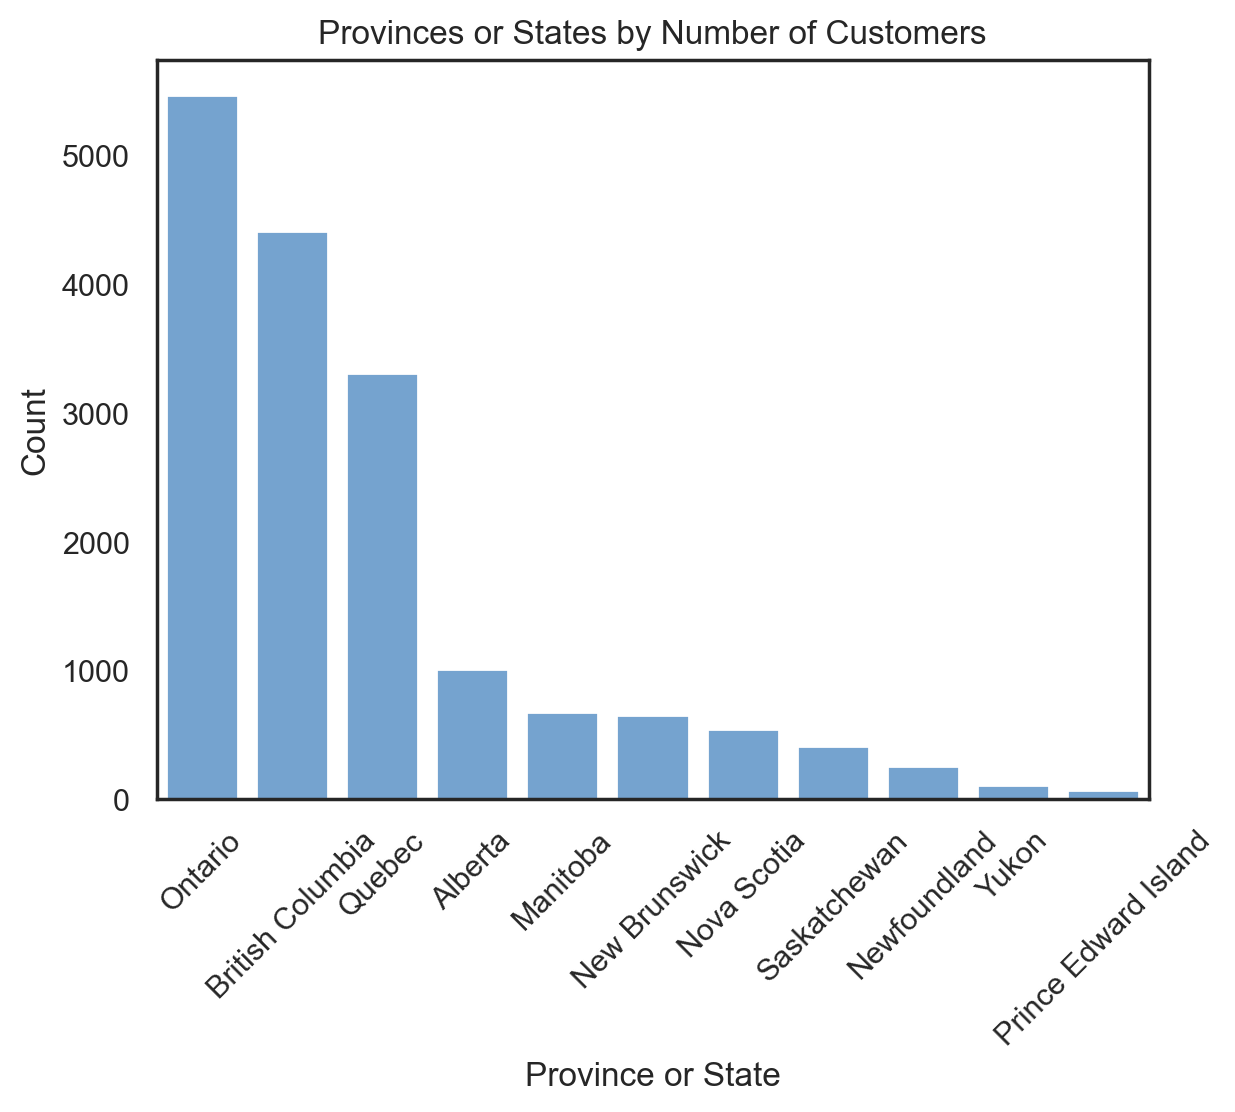

In [21]:
provinces_or_states = customerDB["Province or State"].value_counts().index

sns.countplot(
    x="Province or State",
    data=customerDB[customerDB["Province or State"].isin(provinces_or_states)],
    order=provinces_or_states,
    color="#66a4de"
)
plt.title("Provinces or States by Number of Customers")
plt.xlabel("Province or State")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

The results show that Ontario, British Columbia, and Quebec have the largest number of customers, indicating that most of the client base is concentrated in these provinces.

<span style="font-size:20px;">
<b> EnrollmentDateOpening <b>

A monthly enrollment plot was also created to analyze temporal trends in customer acquisition. The visualization reveals monthly variations and highlights potential seasonal or campaign-related effects that are not visible at the yearly level.

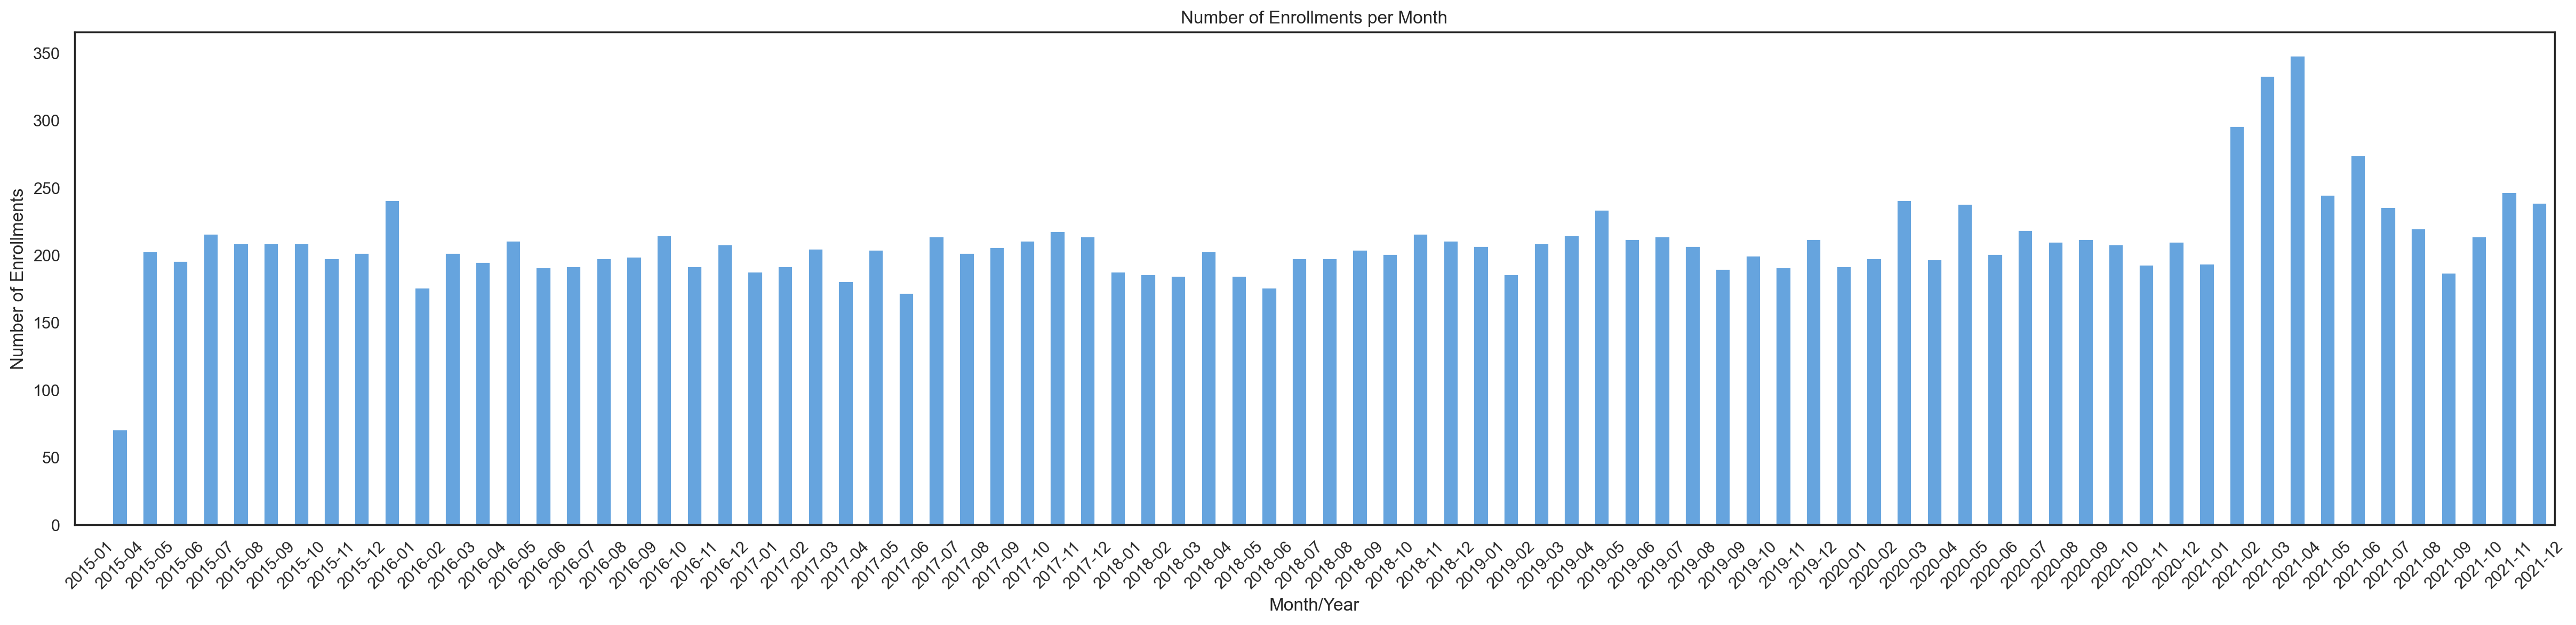

In [22]:
customerDB["EnrollmentDateOpening"] = pd.to_datetime(customerDB["EnrollmentDateOpening"])
monthly_enrollment = customerDB["EnrollmentDateOpening"].dt.to_period("M").value_counts().sort_index()

plt.figure(figsize=(30,6))
monthly_enrollment.plot(kind="bar", color="#66a4de")
plt.title("Number of Enrollments per Month")
plt.xlabel("Month/Year")
plt.ylabel("Number of Enrollments")
plt.xticks(rotation=45)
plt.show()

The monthly enrollment data shows a generally stable trend with noticeable peaks towards the end of each year, suggesting periodic increases in customer activity. This pattern may be linked to seasonal promotions or renewal cycles, indicating opportunities to reinforce marketing strategies during these high-demand periods.

## Relationship between Categorical Features

As mentioned earlier, we will now explore the possible relationships between the categorical features. This analysis will help us uncover patterns and gain insights that may be relevant for understanding customer behavior and supporting further analysis.

### Stacked bar charts

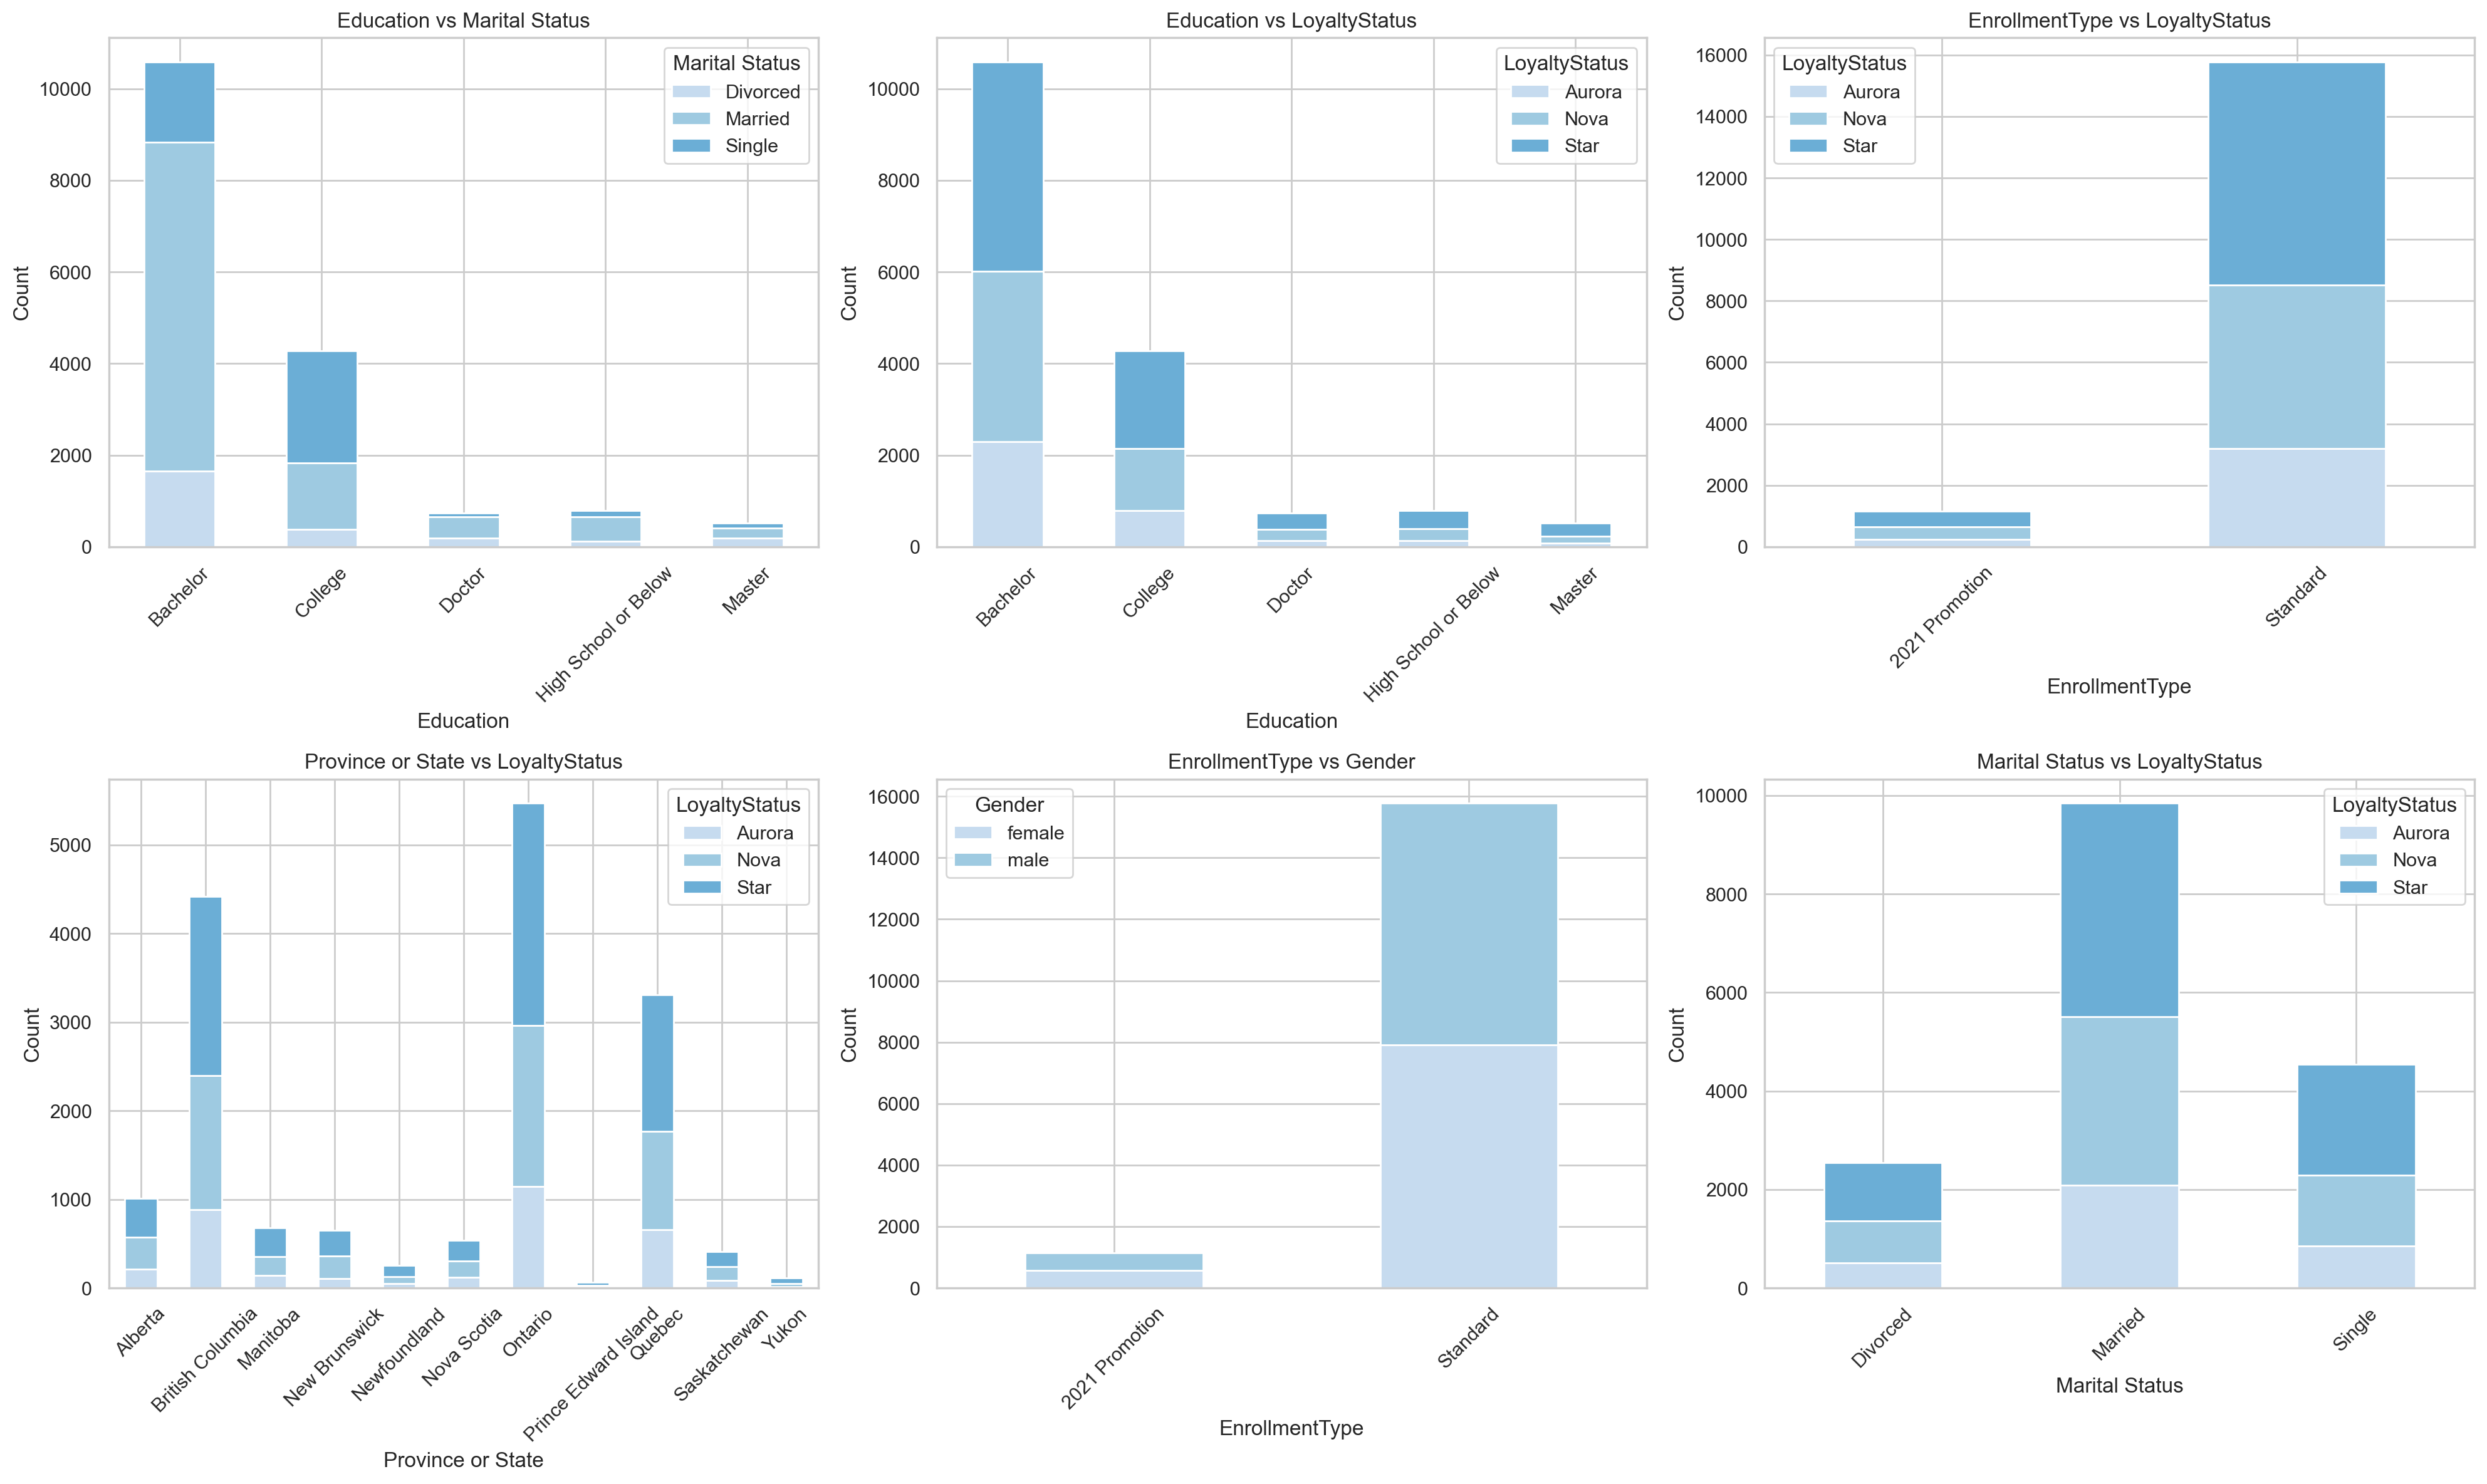

In [23]:
# Style setting
sns.set(style="whitegrid")

# Generate all 2-way combinations
pairs_to_plot = [
    ('Education', 'Marital Status'),
    ('Education', 'LoyaltyStatus'),
    ('EnrollmentType', 'LoyaltyStatus'),
    ('Province or State', 'LoyaltyStatus'),
    ('EnrollmentType', 'Gender'),
    ('Marital Status', 'LoyaltyStatus'),
]

# Create figure with subplots
fig, axes = plt.subplots(2, 3 , figsize=(20, 12))
axes = axes.flatten()

# Generate a plot for each pair
for i, (x, y) in enumerate(pairs_to_plot):
    pd.crosstab(customerDB[x], customerDB[y]).plot(kind='bar', stacked=True, ax=axes[i], color=['#c6dbef', '#9ecae1', '#6baed6', '#3182bd', '#08519c'])
    axes[i].set_title(f"{x} vs {y}")
    axes[i].set_xlabel(x)
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=45)




# Delete unused subplots
for j in range(10, len(axes)):
    fig.delaxes(axes[j]) 
    
plt.tight_layout()
plt.show()

`Education vs Marital Status and Education vs LoyaltyStatus`:
As seen before, the predominant group of customers holds a "Bachelor" degree. Among these "Bachelor" customers, many are married (as shown in the first chart) and belong to the "Star" loyalty status (as seen in the second chart). This suggests that married customers with a "Bachelor" level of education tend to achieve the highest loyalty status ("Star") in the company.

`EnrollmentType vs LoyaltyStatus and EnrollmentType vs Gender`:
The analysis reveals that the "Standard" enrollment group has the highest customer concentration and represents the main segment of the database. Within this group, most customers reach the top loyalty statuses, especially "Star" and then "Nova". Additionally, the proportion of male and female customers is roughly equal among "Standard" members, indicating a balanced gender distribution in the core loyal segment.

`Province or State vs LoyaltyStatus`:
The combined analysis shows that most customers are located in British Columbia, Ontario, and Quebec, as previously identified. Within these key provinces, the majority of customers consistently belong to the highest loyalty status, "Star". This indicates that the most loyal and engaged clients are concentrated in these regions, highlighting them as strategic areas for targeted loyalty programs and marketing efforts.

`Marital Status vs LoyaltyStatus`:
As previously seen, the "Married" segment represents the largest proportion of customers. Within this group, most individuals hold the highest loyalty status, "Star", followed by "Nova". This indicates that the company's most loyal customers are predominantly married.









### Stacked histograms by category

These visualizations allow for a clear comparison of how features such as Enrollment Year, Income, and Cancellation Year vary according to Education level and Loyalty Status.
By stacking the data within each category, it becomes easier to observe proportional differences and identify potential patterns in customer enrollment, income distribution, and program retention across distinct loyalty groups.

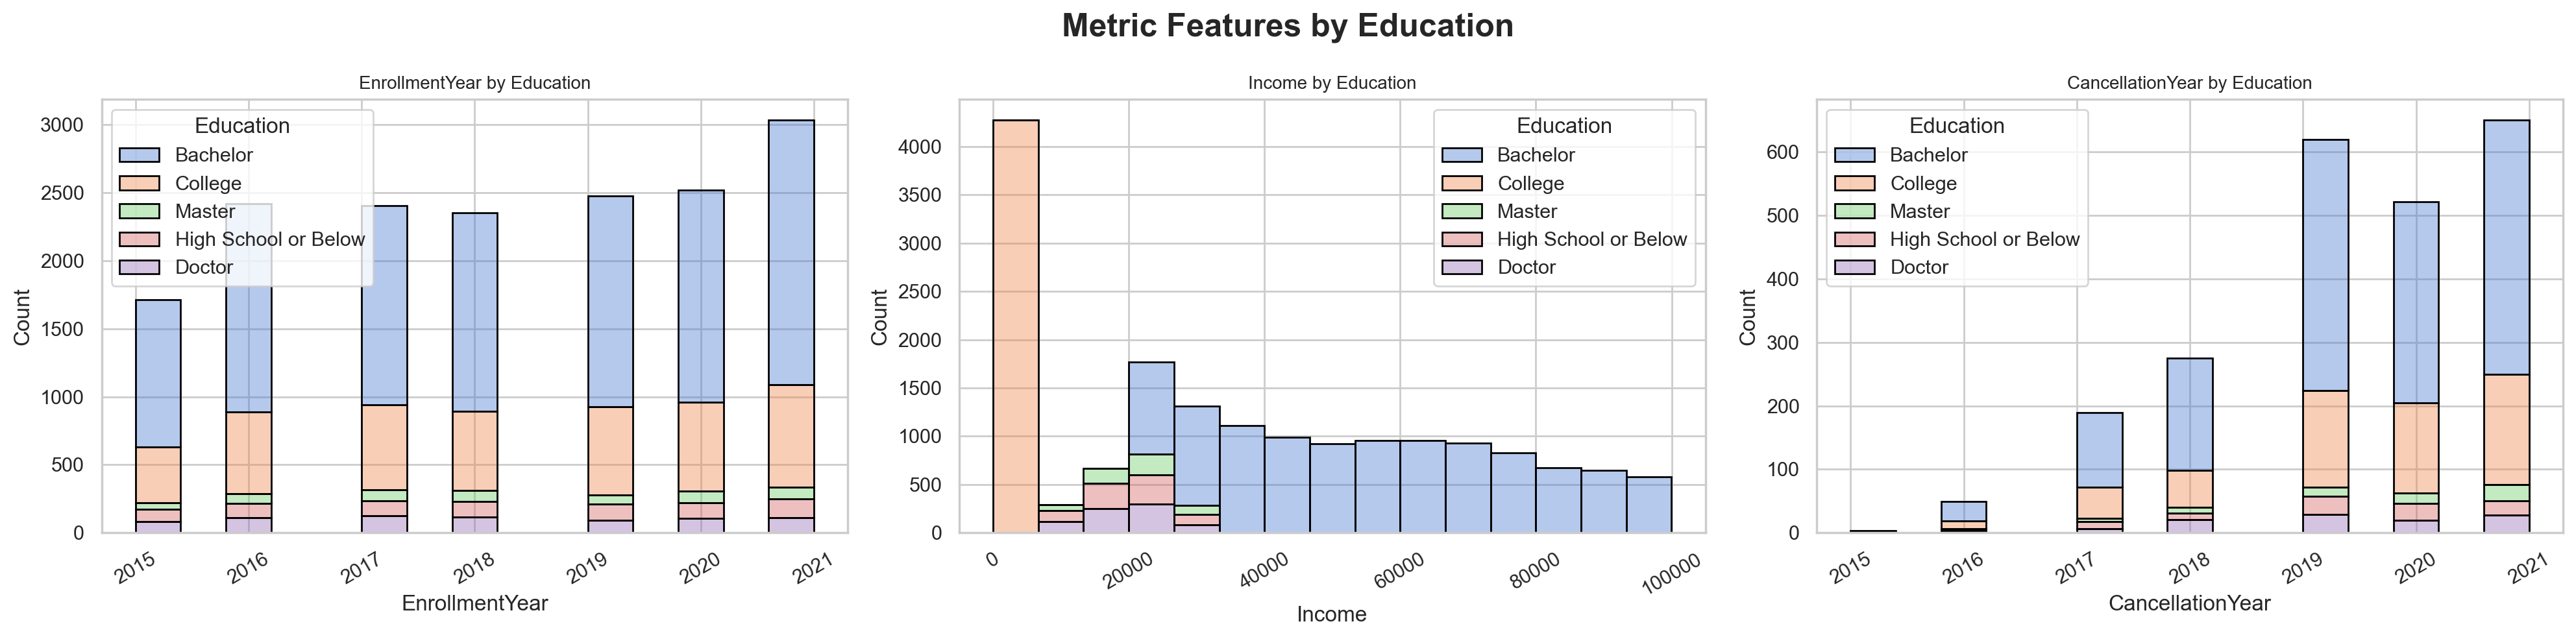

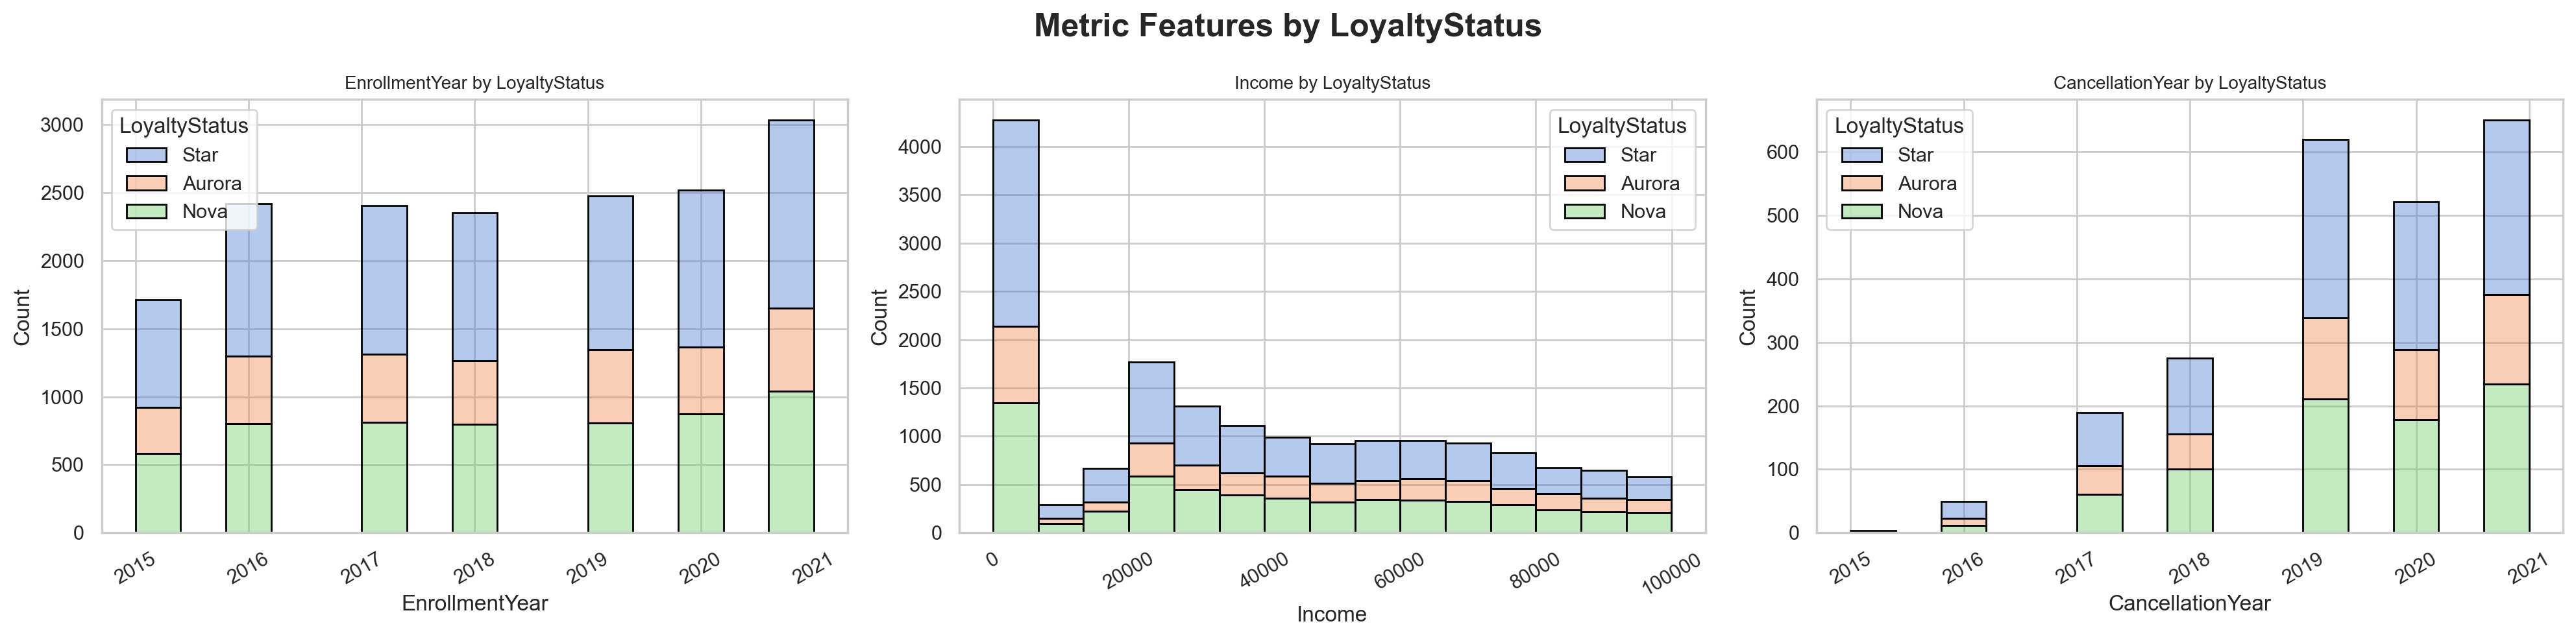

In [24]:
# Loop through each categorical feature for hue
for hue_var in ['Education', 'LoyaltyStatus']:
    fig, axes = plt.subplots(1, 3, figsize=(20, 5))

    for ax, feat in zip(axes.flatten(), ['EnrollmentYear', 'Income', 'CancellationYear']):
        sns.histplot(customerDB, x=feat, hue=hue_var, bins=15, ax=ax,
                     multiple='stack',
                     alpha=0.4, # Transparency for better visibility
                     edgecolor='black',  # Border color for better distinction
                     palette='muted'     # Muted color palette
                    )
        ax.set_title(f"{feat} by {hue_var}", fontsize=10)
        ax.tick_params(axis='x', rotation=30)

    plt.suptitle(f"Metric Features by {hue_var}", fontsize=18, fontweight="bold")
    plt.tight_layout()
    plt.show()

`Metric Features by Education:`
The number of customers has steadily increased over the years, with the majority in each enrollment year consistently coming from the "Bachelor" education category. Furthermore, these "Bachelor" customers tend to have a significantly higher income than those with other education levels, making this group both the largest and most financially valuable segment in the database. However, the number of cancellations has also increased significantly over the years. Among those who cancelled, customers with a "Bachelor" degree consistently represent the highest proportion. This suggests that while "Bachelor" clients dominate new enrollments and income, they also drive the majority of cancellations, highlighting a need to further investigate the retention and satisfaction levels of this critical segment.

`Metric Features by LoyaltyStatus:`
Across all three charts for this section, the "Star" loyalty status consistently represents the largest group, whether in terms of total customers, income, or cancellations. "Star" customers are typically the highest earners, but they also account for the majority of cancellations. This pattern reinforces the importance of monitoring and understanding the needs and retention challenges of the "Star" segment, as they are both the most valuable and the most at risk.

### **Customer Lifetime Value by Enrollment Year and Loyalty Status**

This line plot illustrates the evolution of Customer Lifetime Value (CLV) across different enrollment years, segmented by Loyalty Status.
The objective is to observe whether the year in which customers joined the loyalty program influences their overall lifetime value and to identify potential differences between loyalty tiers over time. The shaded areas represent the confidence intervals, helping assess variability within each group.

<Axes: xlabel='EnrollmentYear', ylabel='Customer Lifetime Value'>

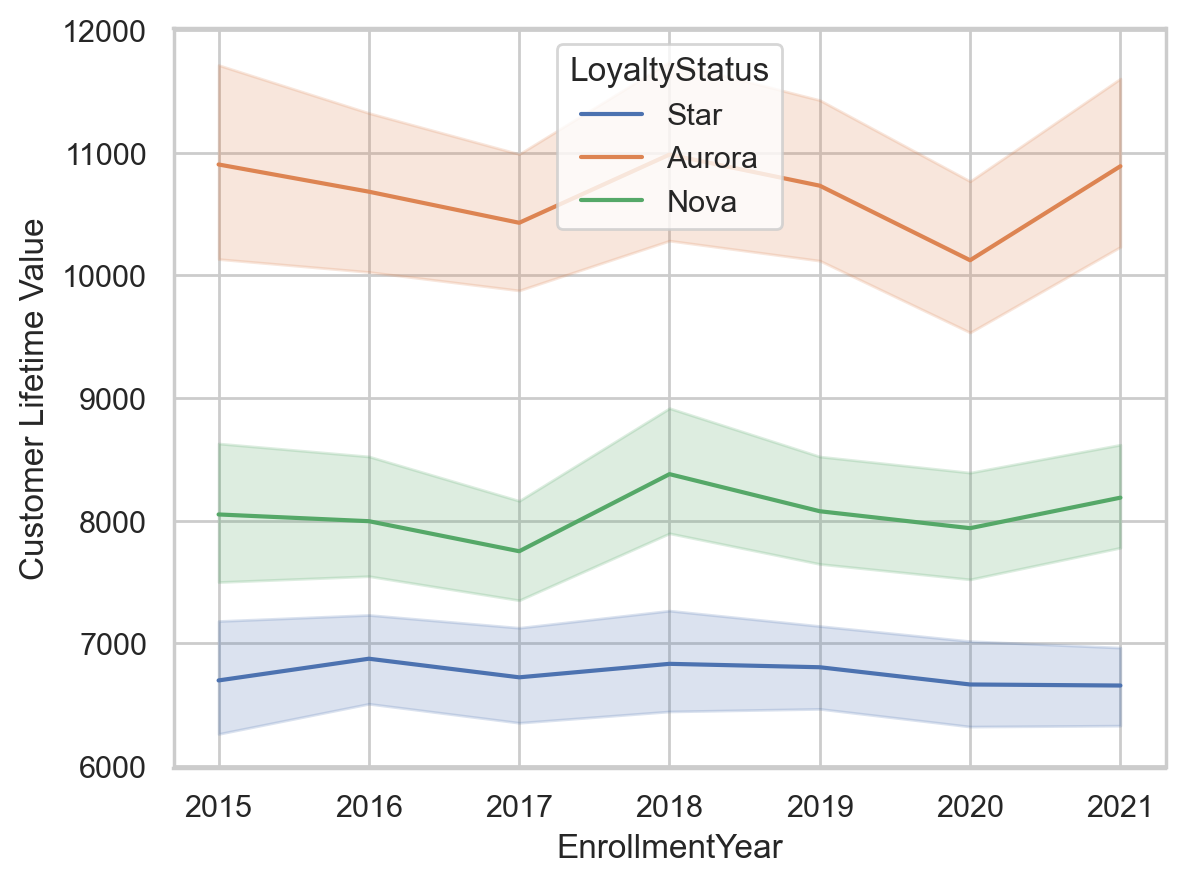

In [25]:
sns.lineplot(data=customerDB, x='EnrollmentYear', y='Customer Lifetime Value', hue='LoyaltyStatus')

The results show a clear separation between loyalty tiers, with Aurora members consistently achieving the highest Customer Lifetime Value, followed by Nova and Star. This suggest that higher loyalty status correlates with increased long-term customer value.
Although there are slight fluctuations across enrollment years, the relative hierarchy between tiers remains stable, suggesting that the loyalty program effectively retains and rewards high-value customers regardless of enrollment period.

### **Income Distribution by Education Level and Gender**

This boxplot visualizes the distribution of Income across different Education levels, with a further breakdown by Gender.
The purpose of this analysis is to explore how educational attainment influences income and to assess whether gender plays a significant role within each education category. Boxplots are particularly useful here as they display both the spread and central tendency of income, while also revealing potential outliers.

<Axes: xlabel='Education', ylabel='Income'>

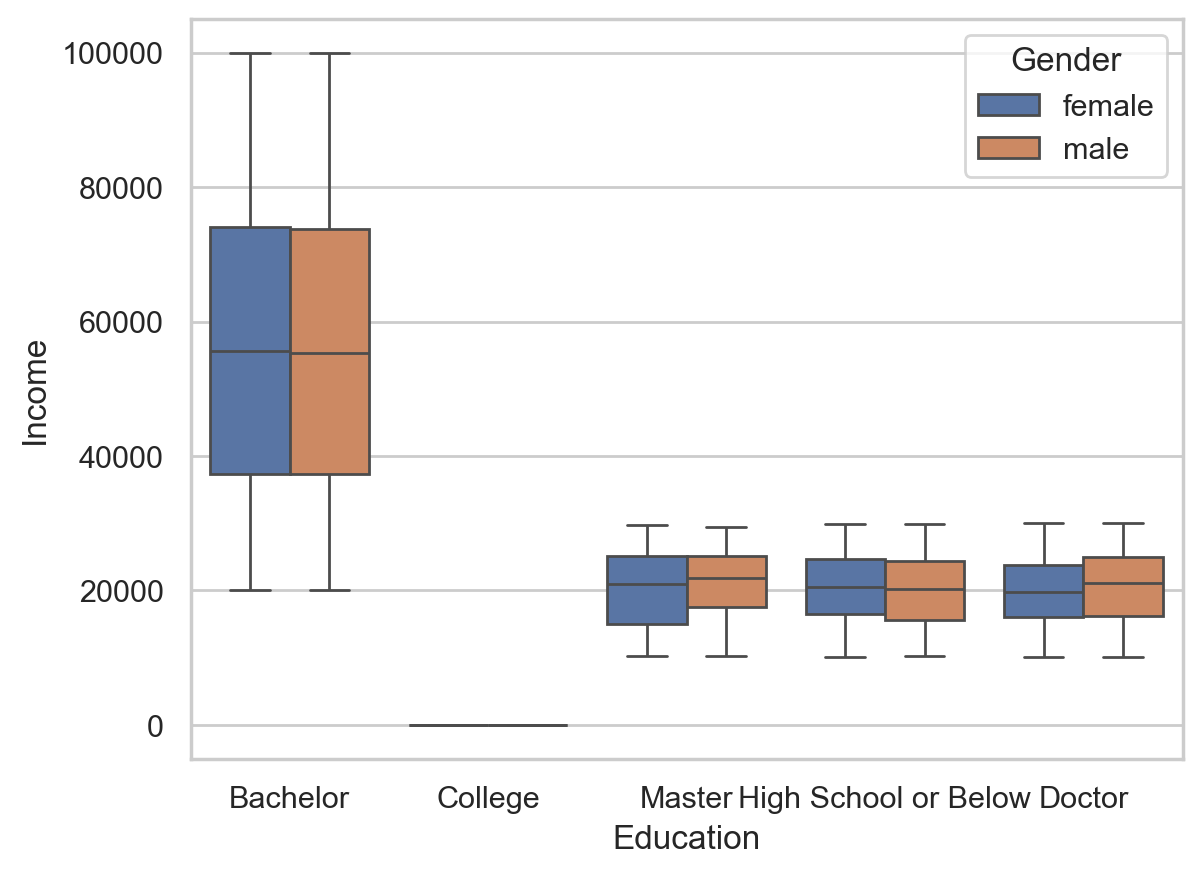

In [26]:
sns.boxplot(data=customerDB, x='Education', y='Income', hue='Gender')

The results show that Bachelor’s degree holders have substantially higher income levels compared to all other education categories, indicating a strong positive relationship between this education level and earning potential.
Across all education levels, income differences between genders are minimal, suggesting that gender does not have a pronounced impact on income within this dataset.
Education appears to be the primary factor driving income variation, while gender-based disparities are relatively insignificant.

### **Gender Distribution Across Education Levels**

This heatmap illustrates the distribution of education levels across genders, showing the proportion of males and females within each education category.
By normalizing the values by gender, it allows for a clear comparison of how educational attainment varies between men and women, highlighting potential trends or imbalances in the dataset.

<Axes: xlabel='Education', ylabel='Gender'>

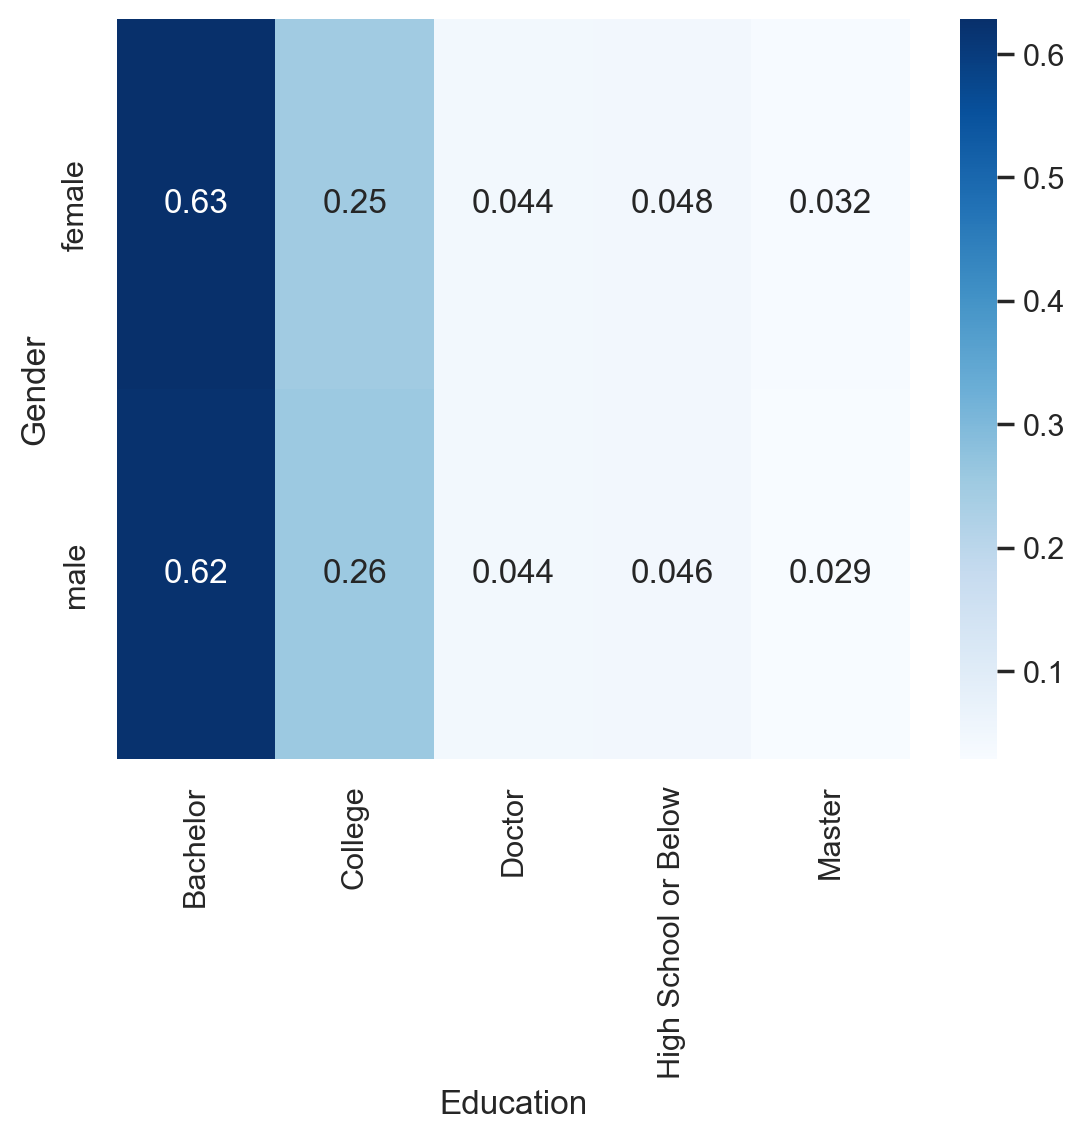

In [27]:
tab = pd.crosstab(customerDB['Gender'], customerDB['Education'], normalize='index')
sns.heatmap(tab, annot=True, cmap='Blues')

The results reveal a very similar distribution of education levels between genders. Both males and females have the highest representation among those with a Bachelor’s degree, followed by College education.
Advanced degrees such as Doctor or Master, as well as High School or Below, are considerably less common across both genders.
Overall, gender does not appear to significantly influence education level, suggesting a balanced educational profile between male and female customers.